In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings

warnings.filterwarnings('ignore')
sns.set(style='white')

In [2]:
data = pd.read_csv('churn_prediction.csv')

In [3]:
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
1,2,2348,35,Male,0.0,self_employed,NaN,2,3214,5390.37,...,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
3,5,2329,90,NaN,NaN,self_employed,1020.0,2,582,2291.91,...,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03


In [4]:
data.shape

(28382, 21)

In [5]:
data.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn',
       'last_transaction'],
      dtype='object')

In [6]:
data.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
last_transaction                   object
dtype: object

In [7]:
data.dtypes[data.dtypes=='int64']

customer_id             int64
vintage                 int64
age                     int64
customer_nw_category    int64
branch_code             int64
churn                   int64
dtype: object

#### Summary 
1. customer_id is a unique number so it is okay to have it as integer
2. Vintage and age are numbers so i am okay with that
3. customer_nw_category is a category so it has to be converted to category
4. branch_code is a category we hv to convert that into category
5. churn is a binary category we hv to convert that also

In [8]:
data['churn'] = data['churn'].astype('category')
data['branch_code'] = data['branch_code'].astype('category')
data['customer_nw_category'] = data['customer_nw_category'].astype('category')
data.dtypes[data.dtypes=='int64']

customer_id    int64
vintage        int64
age            int64
dtype: object

In [9]:
data.dtypes[data.dtypes=='float64']

dependents                        float64
city                              float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
dtype: object

#### Summary
1. dependants is a whole number hence it has to be converted to int
2. city is categorical varible henc eit has to be converted to category
3. rest all credit balance debit it is best to keep them as float

In [10]:










data['dependents'] = data['dependents'].astype('Int64')
data['city'] = data['city'].astype('category')
data.dtypes[data.dtypes=='float64']

current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
dtype: object

In [11]:
data.dtypes

customer_id                          int64
vintage                              int64
age                                  int64
gender                              object
dependents                           Int64
occupation                          object
city                              category
customer_nw_category              category
branch_code                       category
current_balance                    float64
previous_month_end_balance         float64
average_monthly_balance_prevQ      float64
average_monthly_balance_prevQ2     float64
current_month_credit               float64
previous_month_credit              float64
current_month_debit                float64
previous_month_debit               float64
current_month_balance              float64
previous_month_balance             float64
churn                             category
last_transaction                    object
dtype: object

#### Summary
1. gender , occupation, last transaction are on=bject datatypes

In [12]:
data['gender'] = data['gender'].astype('category')
data['occupation'] = data['occupation'].astype('category')
data[['gender','occupation']].dtypes

gender        category
occupation    category
dtype: object

In [13]:
date = pd.DatetimeIndex(data['last_transaction'])

In [14]:
data['doy_lst_transaction'] = date.dayofyear
data['woy_lst_transaction'] = date.weekofyear
data['moy_lst_transaction'] = date.month
data['dow_lst_transaction'] = date.dayofweek

In [15]:
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction,doy_lst_transaction,woy_lst_transaction,moy_lst_transaction,dow_lst_transaction
0,1,2101,66,Male,0,self_employed,187.0,2,755,1458.71,...,0.20,0.20,1458.71,1458.71,0,2019-05-21,141.0,21.0,5.0,1.0
1,2,2348,35,Male,0,self_employed,NaN,2,3214,5390.37,...,5486.27,100.56,6496.78,8787.61,0,2019-11-01,305.0,44.0,11.0,4.0
2,4,2194,31,Male,0,salaried,146.0,2,41,3913.16,...,6046.73,259.23,5006.28,5070.14,0,NaT,NaN,NaN,NaN,NaN
3,5,2329,90,NaN,<NA>,self_employed,1020.0,2,582,2291.91,...,0.47,2143.33,2291.91,1669.79,1,2019-08-06,218.0,32.0,8.0,1.0
4,6,1579,42,Male,2,self_employed,1494.0,3,388,927.72,...,588.62,1538.06,1157.15,1677.16,1,2019-11-03,307.0,44.0,11.0,6.0


In [16]:
numerical_cols = data.select_dtypes(include=['int','float']).columns

In [17]:
numerical_cols

Index(['customer_id', 'vintage', 'age', 'dependents', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance',
       'doy_lst_transaction', 'woy_lst_transaction', 'moy_lst_transaction',
       'dow_lst_transaction'],
      dtype='object')

In [18]:
data[data['current_balance']==data['current_balance'].min()]
#data['current_balance'].min()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction,doy_lst_transaction,woy_lst_transaction,moy_lst_transaction,dow_lst_transaction
12608,13467,2140,80,Male,0,retired,1096.0,1,27,-5503.96,...,15229.44,7859.37,1050.17,2002.97,1,2019-12-26,360.0,52.0,12.0,3.0


In [19]:
data[data['current_month_debit']==data['current_month_debit'].max()]

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction,doy_lst_transaction,woy_lst_transaction,moy_lst_transaction,dow_lst_transaction
24095,25712,1902,90,Male,0,retired,1020.0,2,5,46.5,...,7637857.36,0.21,8399.62,24270.54,1,2019-12-13,347.0,50.0,12.0,4.0


In [20]:
print(data['age'].min(),data['age'].max())

1 90


In [21]:
data[numerical_cols].max()

customer_id                          30301.00
vintage                               2476.00
age                                     90.00
dependents                              52.00
current_balance                    5905904.03
previous_month_end_balance         5740438.63
average_monthly_balance_prevQ      5700289.57
average_monthly_balance_prevQ2     5010170.10
current_month_credit              12269845.39
previous_month_credit              2361808.29
current_month_debit                7637857.36
previous_month_debit               1414168.06
current_month_balance              5778184.77
previous_month_balance             5720144.50
doy_lst_transaction                    365.00
woy_lst_transaction                     52.00
moy_lst_transaction                     12.00
dow_lst_transaction                      6.00
dtype: float64

In [22]:
print(data[numerical_cols].max(),data[numerical_cols].min())

customer_id                          30301.00
vintage                               2476.00
age                                     90.00
dependents                              52.00
current_balance                    5905904.03
previous_month_end_balance         5740438.63
average_monthly_balance_prevQ      5700289.57
average_monthly_balance_prevQ2     5010170.10
current_month_credit              12269845.39
previous_month_credit              2361808.29
current_month_debit                7637857.36
previous_month_debit               1414168.06
current_month_balance              5778184.77
previous_month_balance             5720144.50
doy_lst_transaction                    365.00
woy_lst_transaction                     52.00
moy_lst_transaction                     12.00
dow_lst_transaction                      6.00
dtype: float64 customer_id                           1.00
vintage                              73.00
age                                   1.00
dependents                  

In [23]:
for col in numerical_cols:
    print('range of {}{}{}{}{}{}{}{}'.format(col,':',' ','[',data[col].min(),',',data[col].max(),']'))

range of customer_id: [1,30301]
range of vintage: [73,2476]
range of age: [1,90]
range of dependents: [0,52]
range of current_balance: [-5503.96,5905904.03]
range of previous_month_end_balance: [-3149.57,5740438.63]
range of average_monthly_balance_prevQ: [1428.69,5700289.57]
range of average_monthly_balance_prevQ2: [-16506.1,5010170.1]
range of current_month_credit: [0.01,12269845.39]
range of previous_month_credit: [0.01,2361808.29]
range of current_month_debit: [0.01,7637857.36]
range of previous_month_debit: [0.01,1414168.06]
range of current_month_balance: [-3374.18,5778184.77]
range of previous_month_balance: [-5171.92,5720144.5]
range of doy_lst_transaction: [1.0,365.0]
range of woy_lst_transaction: [1.0,52.0]
range of moy_lst_transaction: [1.0,12.0]
range of dow_lst_transaction: [0.0,6.0]


In [24]:
print(data['age'].mean())
print(data[data['churn']==1]['age'].mean())

48.208336269466564
47.461216730038025


In [25]:
print(data['current_balance'].mean())
print(data[data['churn']==1]['current_balance'].mean())

7380.551803607912
5220.884321292768


In [26]:
data['age'].median()

46.0

In [27]:
data[data['churn']==1]['age'].median()

45.0

In [28]:
data['current_balance'].var()

1814650257.5186183

In [29]:
data['current_balance'].std()

42598.71192323329

In [30]:
data.describe(include=[int,float])

,customer_id,vintage,age,dependents,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,doy_lst_transaction,woy_lst_transaction,moy_lst_transaction,dow_lst_transaction
count,28382.000000,28382.000000,28382.000000,25919.000000,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,25159.000000,25159.000000,25159.000000,25159.000000
mean,15143.508667,2091.144105,48.208336,0.347236,7.380552e+03,7.495771e+03,7.496780e+03,7.124209e+03,3.433252e+03,3.261694e+03,3.658745e+03,3.339761e+03,7.451133e+03,7.495177e+03,295.045709,39.116300,10.142255,3.042728
std,8746.454456,272.676775,17.807163,0.997661,4.259871e+04,4.252935e+04,4.172622e+04,4.457581e+04,7.707145e+04,2.968889e+04,5.198542e+04,2.430111e+04,4.203394e+04,4.243198e+04,86.284356,15.889797,2.788671,1.712724
min,1.000000,73.000000,1.000000,0.000000,-5.503960e+03,-3.149570e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,1.000000,1.000000,1.000000,0.000000
25%,7557.250000,1958.000000,36.000000,0.000000,1.784470e+03,1.906000e+03,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,1.996765e+03,2.074407e+03,270.000000,33.000000,9.000000,1.000000
50%,15150.500000,2154.000000,46.000000,0.000000,3.281255e+03,3.379915e+03,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,9.193000e+01,1.099600e+02,3.447995e+03,3.465235e+03,335.000000,47.000000,12.000000,3.000000
75%,22706.750000,2292.000000,60.000000,0.000000,6.635820e+03,6.656535e+03,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.360435e+03,1.357553e+03,6.667958e+03,6.654693e+03,354.000000,50.000000,12.000000,5.000000
max,30301.000000,2476.000000,90.000000,52.000000,5.905904e+06,5.740439e+06,5.700290e+06,5.010170e+06,1.226985e+07,2.361808e+06,7.637857e+06,1.414168e+06,5.778185e+06,5.720144e+06,365.000000,52.000000,12.000000,6.000000


In [31]:
churn_age = data[data['churn']==1]['age']
churn_age

3        90
4        42
12       73
14       48
16       49
         ..
28368    78
28372    49
28374    55
28379    47
28381    18
Name: age, Length: 5260, dtype: int64

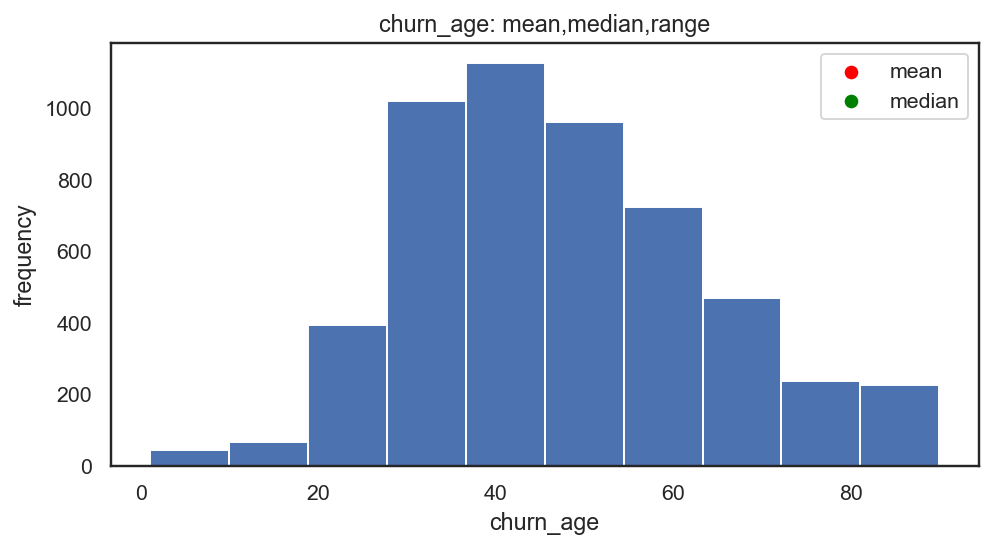

In [32]:
plt.figure(figsize=(8,4),dpi=140)

plt.scatter(churn_age.mean(),0,label='mean',color='red')
plt.scatter(churn_age.median(),0,label='median',color='green')
plt.hist(churn_age,bins=10)

plt.xlabel('churn_age')
plt.ylabel('frequency')
plt.title('churn_age: mean,median,range')
plt.legend()

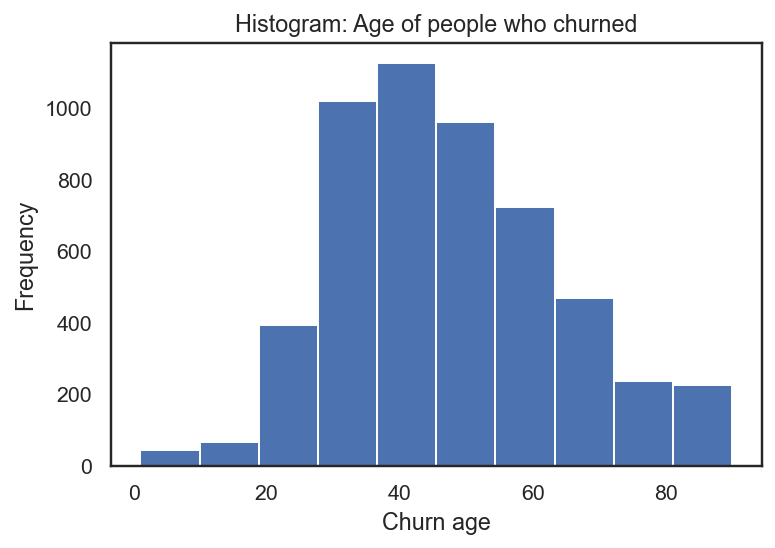

In [33]:
plt.figure(dpi=140)
plt.hist(churn_age)
plt.xlabel('Churn age')
plt.ylabel('Frequency')
plt.title('Histogram: Age of people who churned')
plt.show()

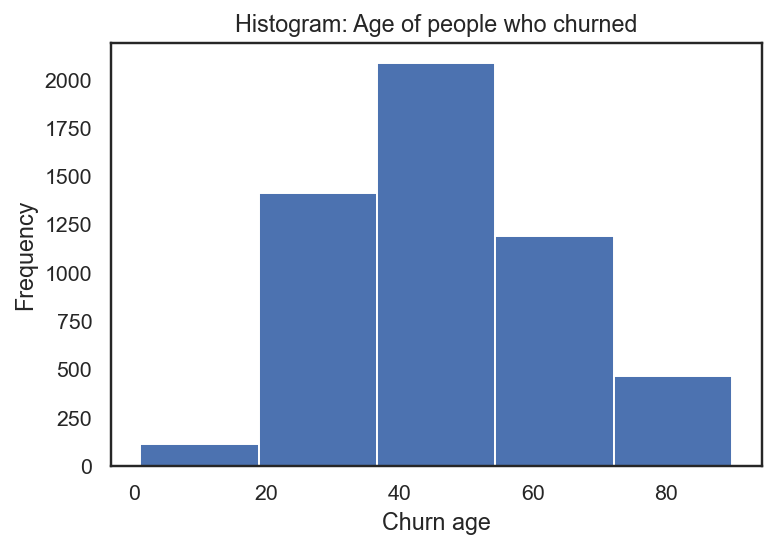

In [34]:
plt.figure(dpi=140)
plt.hist(churn_age,bins = 5)
plt.xlabel('Churn age')
plt.ylabel('Frequency')
plt.title('Histogram: Age of people who churned')
plt.show()

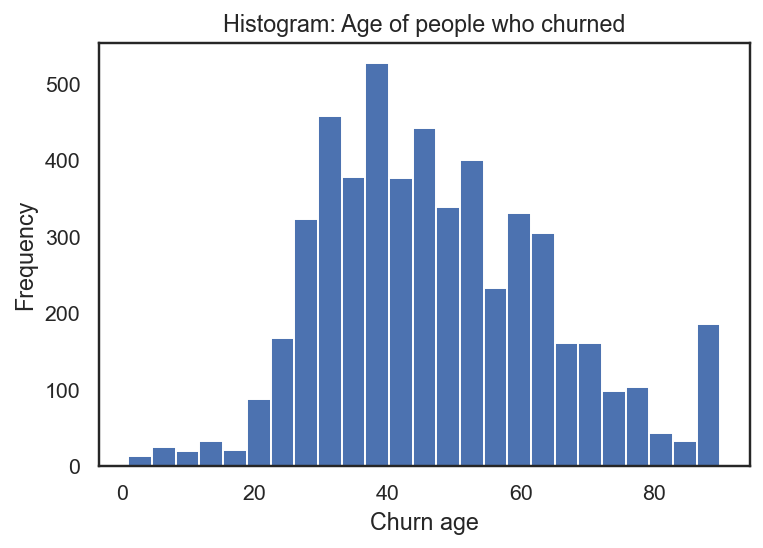

In [35]:
plt.figure(dpi=140)
plt.hist(churn_age,bins = 25)
plt.xlabel('Churn age')
plt.ylabel('Frequency')
plt.title('Histogram: Age of people who churned')
plt.show()

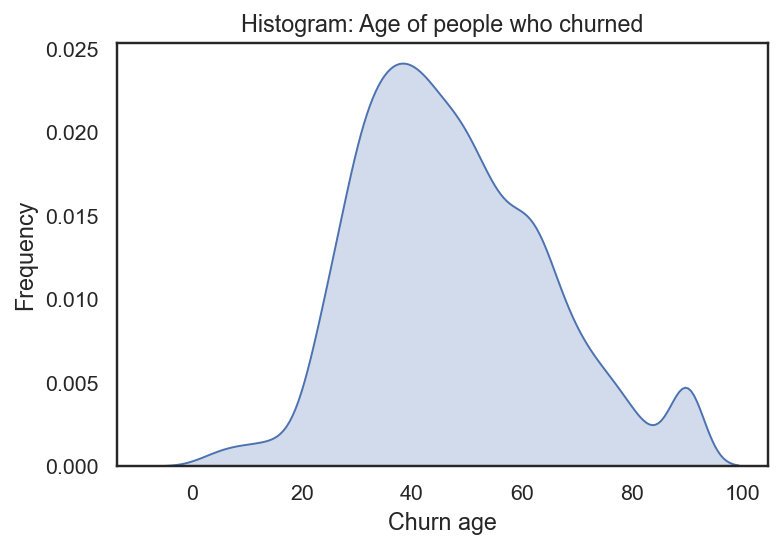

In [36]:
plt.figure(dpi=140)
sns.kdeplot(churn_age,shade =True)
plt.xlabel('Churn age')
plt.ylabel('Frequency')
plt.title('Histogram: Age of people who churned')
plt.show()

In [37]:
mean= churn_age.mean()
median = churn_age.median()
stddev = churn_age.mean()-churn_age.std(),churn_age.mean()+churn_age.std()

mean,median,stddev


(47.461216730038025, 45.0, (30.285242583286085, 64.63719087678996))

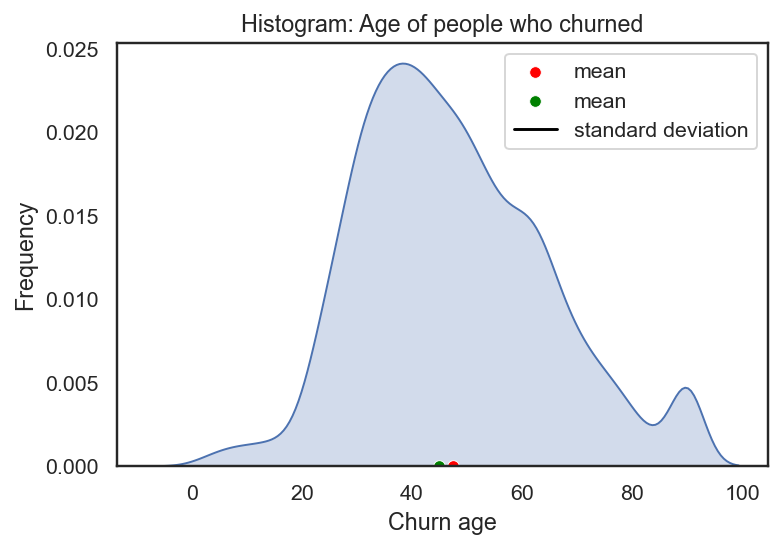

In [38]:
plt.figure(dpi=140)
sns.kdeplot(churn_age,shade=True)
sns.scatterplot([mean],[0],color='red',label='mean')
sns.scatterplot([median],[0],color='green',label='mean')
sns.lineplot(stddev,[0,0],color='black',label = 'standard deviation')

plt.xlabel('Churn age')
plt.ylabel('Frequency')
plt.title('Histogram: Age of people who churned')
plt.show()

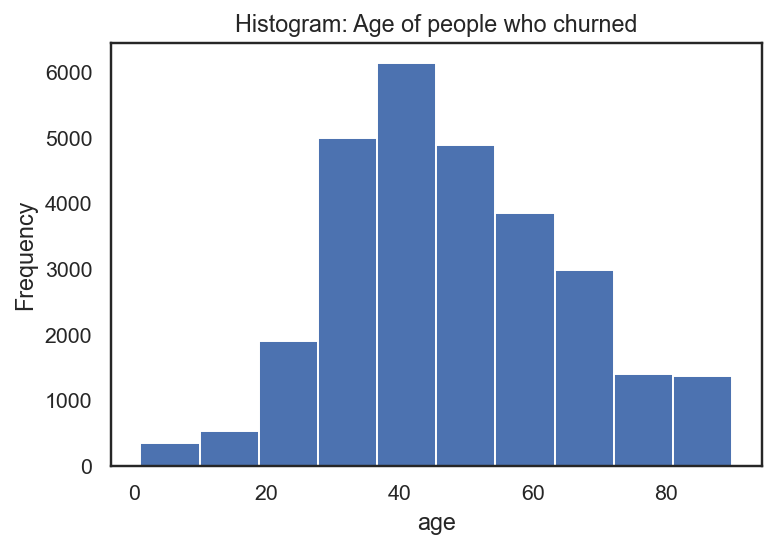

In [39]:
plt.figure(dpi=140)
plt.hist(data['age'])
plt.xlabel('age')
plt.ylabel('Frequency')
plt.title('Histogram: Age of people who churned')
plt.show()

In [40]:
mean= data['age'].mean()
median = data['age'].median()
stddev = data['age'].mean()-data['age'].std(),data['age'].mean()+data['age'].std()

mean,median,stddev

(48.208336269466564, 46.0, (30.401172896500047, 66.01549964243308))

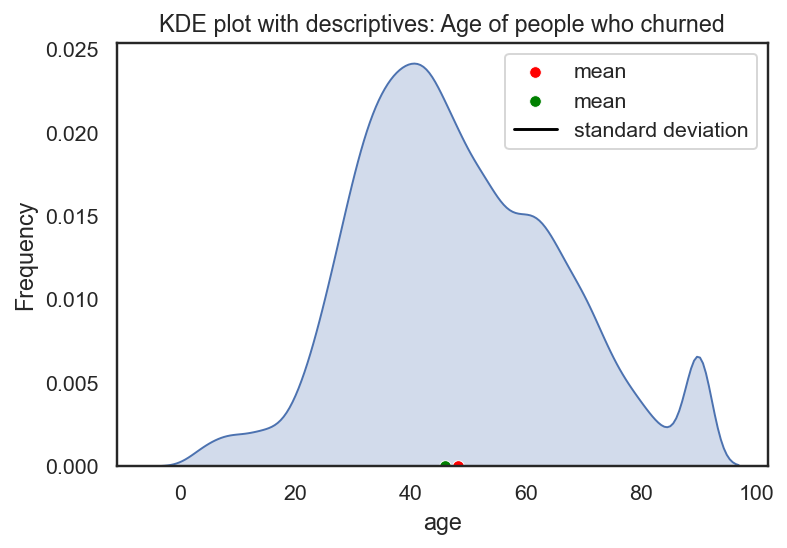

In [41]:
plt.figure(dpi=140)
sns.kdeplot(data['age'],shade=True)
sns.scatterplot([mean],[0],color='red',label='mean')
sns.scatterplot([median],[0],color='green',label='mean')
sns.lineplot(stddev,[0,0],color='black',label = 'standard deviation')

plt.xlabel('age')
plt.ylabel('Frequency')
plt.title('KDE plot with descriptives: Age of people who churned')
plt.show()

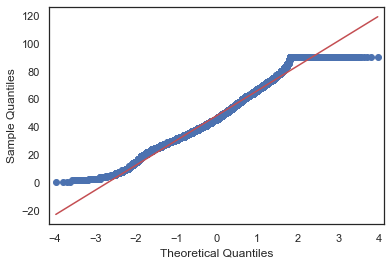

In [42]:
sm.qqplot(data['age'],line='s')
plt.show()

#### Summary
1. larger values are not as larger than normal distribution infact they are smaller than normal distribution values
2. smaller values are larger than normal distribution

In [43]:
data['age'].skew()

0.33058929557517264

#### Summary
1. skewness lies between -0.5 to +0.5 hence its a normal distribution

In [44]:
data['age'].kurtosis()

-0.16866785691275865

#### Summary
1. K values is close to 0
2. this means that tails are not dense as normal distribution
3. there are less values along this tails

In [45]:
v_mean= data['vintage'].mean()
v_median = data['vintage'].median()
v_stddev = data['vintage'].mean()-data['vintage'].std(),data['vintage'].mean()+data['vintage'].std()

v_mean,v_median,v_stddev

(2091.1441054189277, 2154.0, (1818.4673301911992, 2363.820880646656))

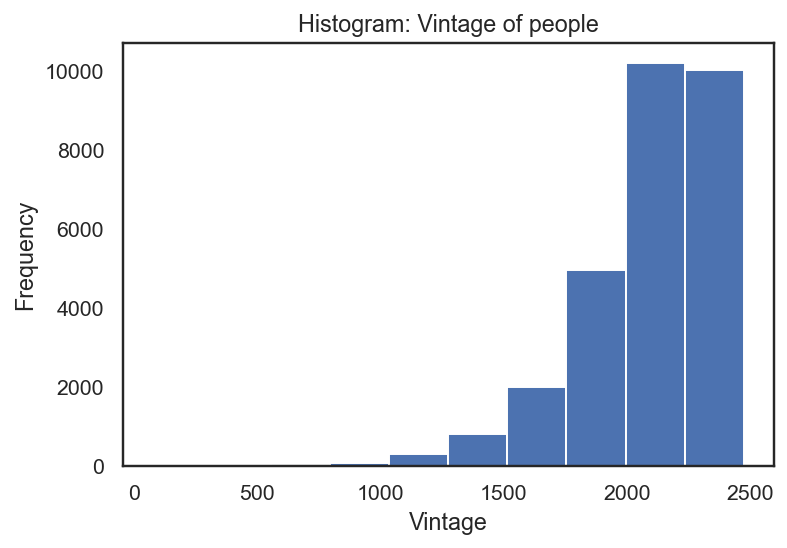

In [46]:
plt.figure(dpi=140)
plt.hist(data['vintage'])
plt.xlabel('Vintage')
plt.ylabel('Frequency')
plt.title('Histogram: Vintage of people')
plt.show()

#### Summary
1. more customers are old to the bank as compared to the new customers
2. itis a left  skewed graph

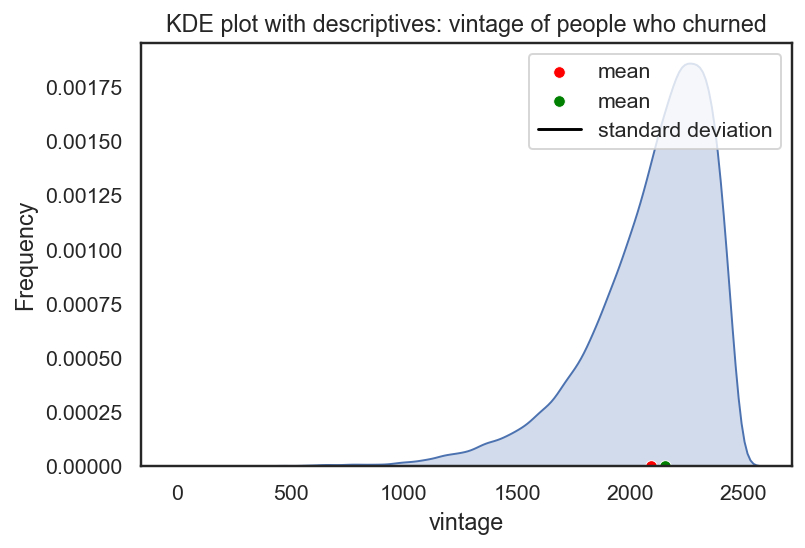

In [47]:
plt.figure(dpi=140)
sns.kdeplot(data['vintage'],shade=True)
sns.scatterplot([v_mean],[0],color='red',label='mean')
sns.scatterplot([v_median],[0],color='green',label='mean')
sns.lineplot(v_stddev,[0,0],color='black',label = 'standard deviation')

plt.xlabel('vintage')
plt.ylabel('Frequency')
plt.title('KDE plot with descriptives: vintage of people who churned')
plt.show()

In [48]:
data['vintage'].skew()

-1.3889357082821185

#### Summary
1. skew is not in the range -0.5 to +0.5 and it is negative hence it is negatively skewed/ left 

In [49]:
data['vintage'].kurtosis()

2.7234245375227926

#### Summary
1. kurtosis  K>0 hence fatter tail longer distribution high presence of extreme values

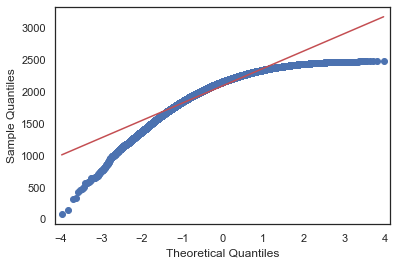

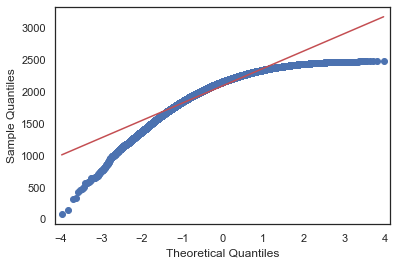

In [50]:
sm.qqplot(data['vintage'],line='s')

# Univariate Anlaysis Numerical Values

In [51]:
data.select_dtypes(include=['int64','float64','Int64']).dtypes

customer_id                         int64
vintage                             int64
age                                 int64
dependents                          Int64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
doy_lst_transaction               float64
woy_lst_transaction               float64
moy_lst_transaction               float64
dow_lst_transaction               float64
dtype: object

In [52]:
customer_details = ['customer_id','age','vintage']
current_month = ['current_balance','current_month_credit','current_month_debit','current_month_balance']
previous_month = ['previous_month_end_balance','previous_month_credit','previous_month_debit','previous_month_balance']
previous_quarter = ['average_monthly_balance_prevQ','average_monthly_balance_prevQ2']
transaction_date = ['doy_lst_transaction','woy_lst_transaction','moy_lst_transaction','dow_lst_transaction']


In [53]:
for j,i in enumerate(customer_details):
    print(j)

0
1
2


In [54]:
def UVA_numeric(data,var_group):
    """
    Univariate Numerical Anlaysis and plot/print all descriptives and properties along with KDE
    input dataframe, variable group
    returns a loop: calculates all the descriptives of ith variable plots/prints it
    """
    size = len(var_group)
    plt.figure(figsize = (7*size,3),dpi = 140)
    
    #looping each variable group
    for j,i in enumerate(var_group):
        
        #calculating descriptives of variable
        mini = data[i].min()
        maxi = data[i].max()
        mean = data[i].mean()
        median = data[i].median()
        st_dev = data[i].std()
        skew = data[i].skew()
        kurt = data[i].kurtosis()
        
        #calculating points of standard_deviation 
        points = mean - st_dev,mean + st_dev
        
        #potting the variable with every piece of information
        plt.subplot(1,size,j+1)
        sns.kdeplot(data[i],shade = True)
        sns.lineplot(points,[0,0],color = 'black',label = 'std_dev')
        sns.scatterplot([mini,maxi],[0,0],color = 'orange',label ="min/max")
        sns.scatterplot([mean],[0],color = 'red', label = 'mean')
        sns.scatterplot([median],[0],color = 'blue',label = 'median')
        plt.xlabel('{}'.format(i),fontsize=20)
        plt.ylabel('Density')
        plt.title('std_dev = {}; kurtosis = {}; \nskew = {}; range = {}; \nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                         round(kurt,2),
                                                                                                         round(skew,2),
                                                                                                         (round(mini,2),round(maxi,2)),
                                                                                                         round(mean,2),
                                                                                                         round(median,2)))
    

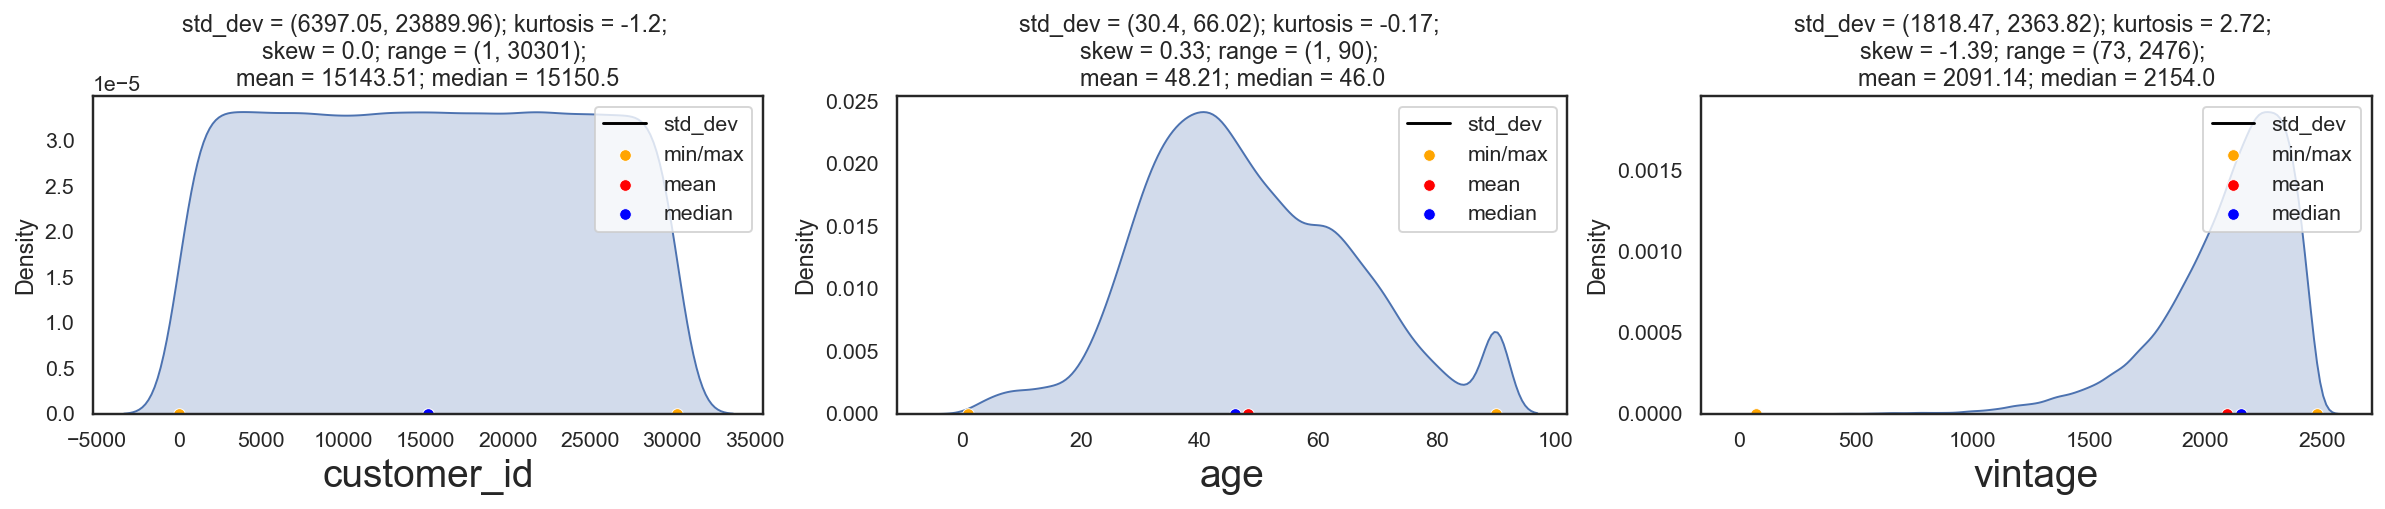

In [55]:
UVA_numeric(data,customer_details)

#### Summary
1. Customer_id
    variable is unique for every cutomer hence uniform distribution
    
    this variable does not confirm any information
    
    Can be eliminated from data
2. age
    Median age = 46
    
    most customer lies between 30 to 66
    
    skewness = +0.33 customer age is negligibly biased towards younger age ??????????????? ask
    
    kurtosis = -0.17 very less likely to have extreme/outlier values
3. Vintage
    most customers joined between 2100 to 2650 from the day of data extraction
    
    skewness = -1.39 which is negativel skewed. which means most customers have been with the bank for a longer period of       time which is also signified by the negatively skewed graph ?????????????????????? ask
    
    kurtosis = 2.72 Extreme values very likely to be present in age 
    
 this bathc has a large number of old Age customers

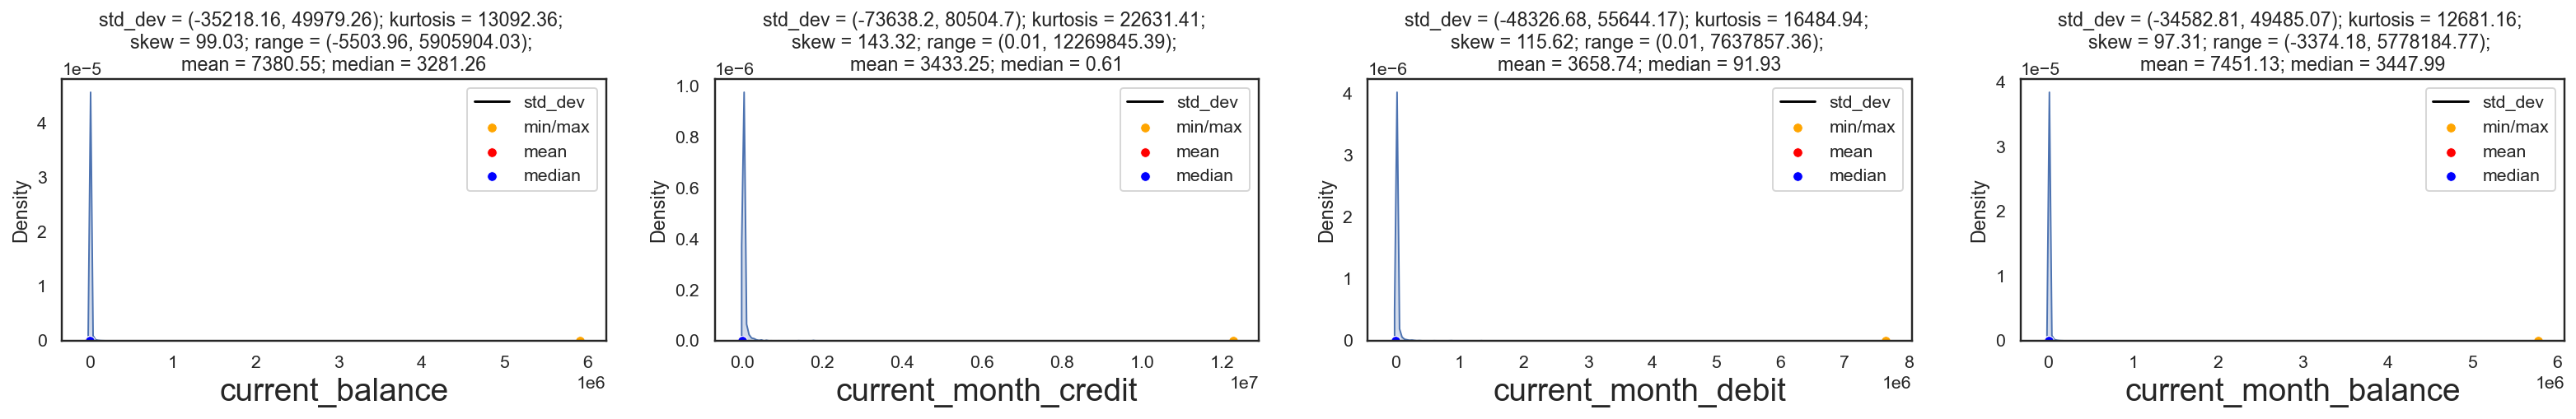

In [56]:
UVA_numeric(data,current_month)

#### Summary
1. considering the skewness and the kurtosis it means it has a large number of outliers
2. median of credit and debit is much lower and given that range has no negative values so we can say that a lot of customers have low number of transaction with the bank

# Need to remove outliers to visualize the plots

In [57]:
#standard deviation factor
factor = 3

#Copying  current month 
cm_data = data[current_month]

#filtering using standard deviation (not considering observations > 3*standard deviations)
cm_data = cm_data[cm_data['current_balance'] < factor*cm_data['current_balance'].std()]
cm_data = cm_data[cm_data['current_month_credit'] < factor*cm_data['current_month_credit'].std()]
cm_data = cm_data[cm_data['current_month_debit'] < factor*cm_data['current_month_debit'].std()]
cm_data = cm_data[cm_data['current_month_balance'] < factor*cm_data['current_month_balance'].std()]

#checking how many points removed
len(data),len(cm_data)

(28382, 27113)

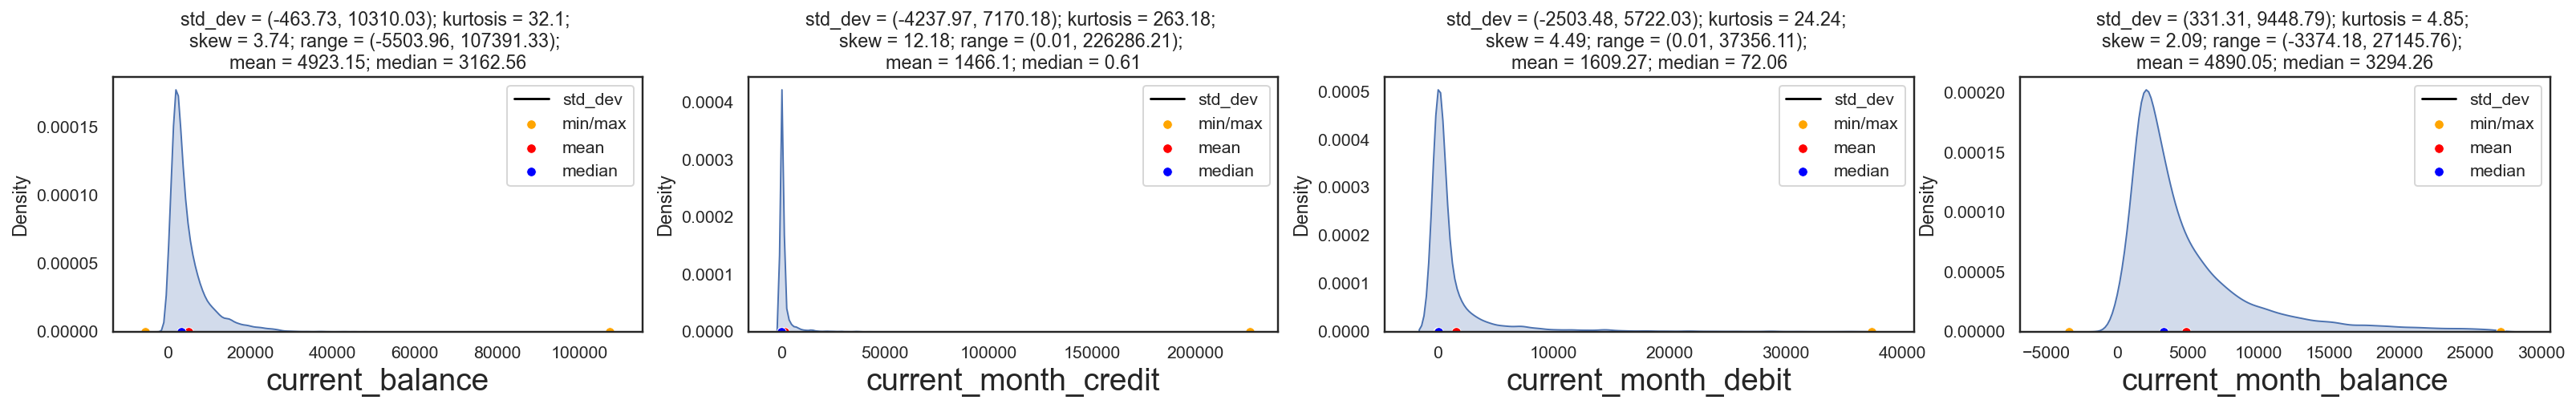

In [58]:
UVA_numeric(cm_data,current_month)

#### Summary of current month
1. after removing points plots still skewed with a lot of values concentrated to lower balances/credit/debit
#### Questions?
1. Is there any common trait/relation between the customers who is performing high value transactions credit and debit
2. customers who are performing high value of transactions are they doing it every month ?

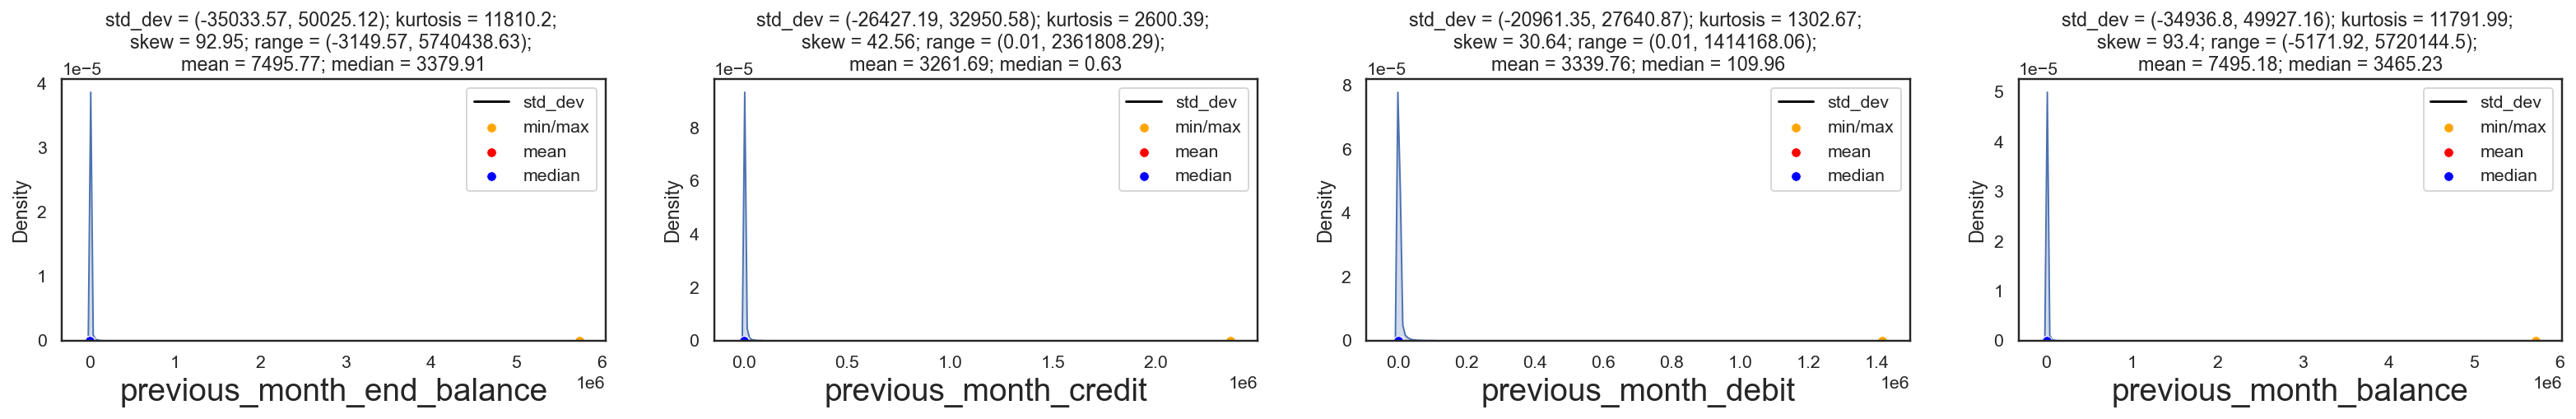

In [59]:
UVA_numeric(data,previous_month)








#### Summary
1. looks similar to current month , most transactions are carried out by them is low amount transactions
2. clearly i can see a pattern that it does happens every month those are the same customers


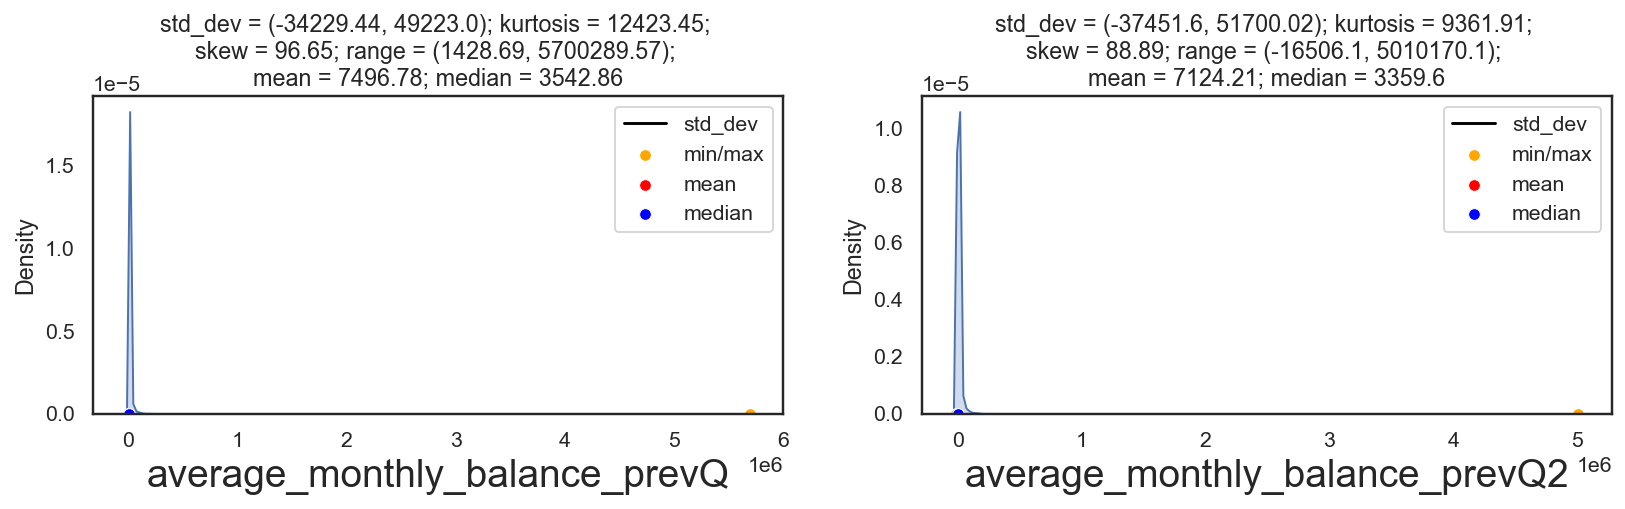

In [60]:
UVA_numeric(data,previous_quarter)

#### Summary
The general trend still follows. it is still crucial find put whether there is any common trait between these customerswho perform high transaction

In [61]:
pd.to_datetime(data['last_transaction']).min(),pd.to_datetime(data['last_transaction']).max()

(Timestamp('2018-12-31 00:00:00'), Timestamp('2019-12-31 00:00:00'))

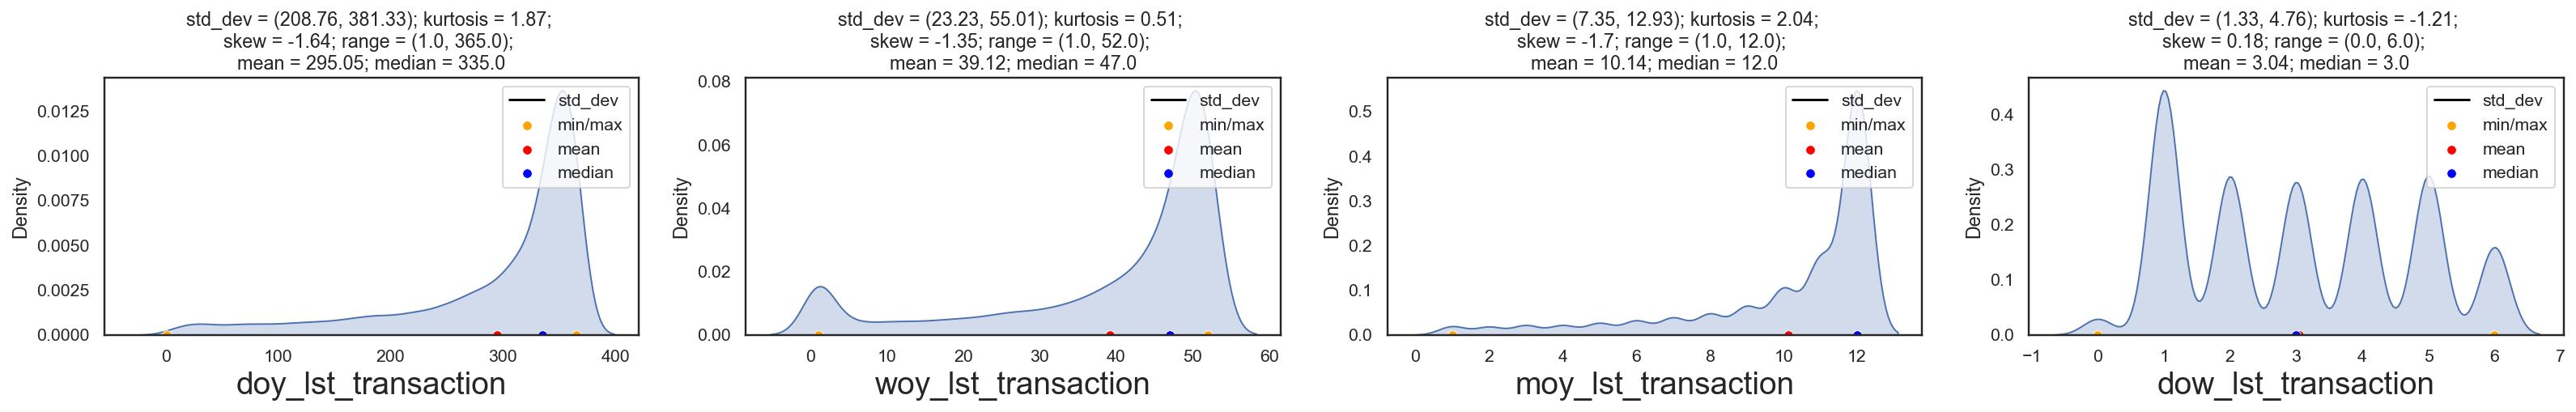

In [62]:
UVA_numeric(data,transaction_date)

In [63]:
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction,doy_lst_transaction,woy_lst_transaction,moy_lst_transaction,dow_lst_transaction
0,1,2101,66,Male,0,self_employed,187.0,2,755,1458.71,...,0.20,0.20,1458.71,1458.71,0,2019-05-21,141.0,21.0,5.0,1.0
1,2,2348,35,Male,0,self_employed,NaN,2,3214,5390.37,...,5486.27,100.56,6496.78,8787.61,0,2019-11-01,305.0,44.0,11.0,4.0
2,4,2194,31,Male,0,salaried,146.0,2,41,3913.16,...,6046.73,259.23,5006.28,5070.14,0,NaT,NaN,NaN,NaN,NaN
3,5,2329,90,NaN,<NA>,self_employed,1020.0,2,582,2291.91,...,0.47,2143.33,2291.91,1669.79,1,2019-08-06,218.0,32.0,8.0,1.0
4,6,1579,42,Male,2,self_employed,1494.0,3,388,927.72,...,588.62,1538.06,1157.15,1677.16,1,2019-11-03,307.0,44.0,11.0,6.0


In [64]:
data.select_dtypes(include=['int64','float64','Int64']).dtypes

customer_id                         int64
vintage                             int64
age                                 int64
dependents                          Int64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
doy_lst_transaction               float64
woy_lst_transaction               float64
moy_lst_transaction               float64
dow_lst_transaction               float64
dtype: object

In [65]:
data['current_month_transactions'] = data['current_month_credit']+data['current_month_debit']
data['previous_month_transactions'] = data['previous_month_credit']+data['previous_month_debit']

In [66]:
data

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,current_month_balance,previous_month_balance,churn,last_transaction,doy_lst_transaction,woy_lst_transaction,moy_lst_transaction,dow_lst_transaction,current_month_transactions,previous_month_transactions
0,1,2101,66,Male,0,self_employed,187.0,2,755,1458.71,...,1458.71,1458.71,0,2019-05-21,141.0,21.0,5.0,1.0,0.40,0.40
1,2,2348,35,Male,0,self_employed,NaN,2,3214,5390.37,...,6496.78,8787.61,0,2019-11-01,305.0,44.0,11.0,4.0,5486.83,101.12
2,4,2194,31,Male,0,salaried,146.0,2,41,3913.16,...,5006.28,5070.14,0,NaT,NaN,NaN,NaN,NaN,6047.34,259.84
3,5,2329,90,NaN,<NA>,self_employed,1020.0,2,582,2291.91,...,2291.91,1669.79,1,2019-08-06,218.0,32.0,8.0,1.0,0.94,2143.80
4,6,1579,42,Male,2,self_employed,1494.0,3,388,927.72,...,1157.15,1677.16,1,2019-11-03,307.0,44.0,11.0,6.0,588.95,2252.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,30297,2325,10,Female,0,student,1020.0,2,1207,1076.43,...,1076.43,1076.43,0,2019-10-22,295.0,43.0,10.0,1.0,0.60,0.60
28378,30298,1537,34,Female,0,self_employed,1046.0,2,223,3844.10,...,3738.54,3690.32,0,2019-12-17,351.0,51.0,12.0,1.0,902.71,1016.36
28379,30299,2376,47,Male,0,salaried,1096.0,2,588,65511.97,...,61078.50,57564.24,1,2019-12-31,365.0,1.0,12.0,1.0,4835.07,3954.86
28380,30300,1745,50,Male,3,self_employed,1219.0,3,274,1625.55,...,1625.55,1625.55,0,NaT,NaN,NaN,NaN,NaN,0.40,0.40


<AxesSubplot:xlabel='occupation', ylabel='current_month_transactions'>

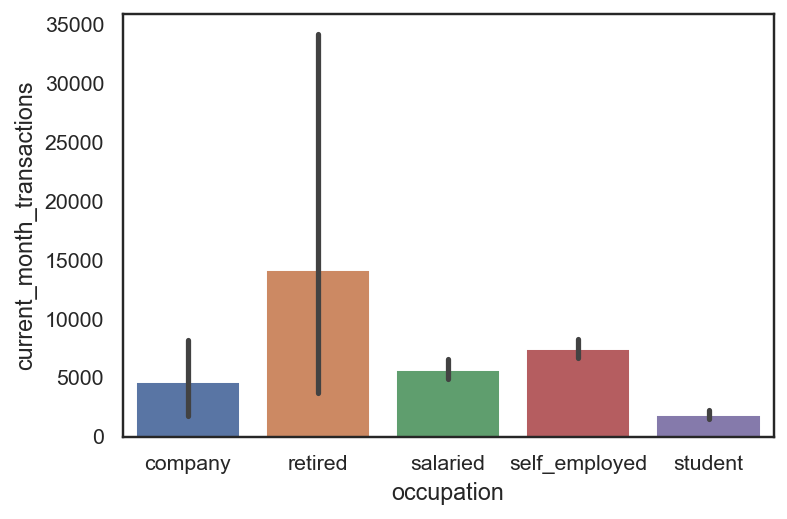

In [67]:
plt.figure(dpi=140)
sns.barplot(x='occupation',y='current_month_transactions',data=data)

In [68]:
plt.figure(dpi=140)
sns.barplot(x='occupation',y=y_tran,data=data)

NameError: name 'y_tran' is not defined

<Figure size 840x560 with 0 Axes>

In [69]:
y_tran = pd.DataFrame(data.groupby(by = 'occupation')['current_month_transactions'].sum())

In [70]:
y_tran.sort_values('current_month_transactions',ascending = False)/sum(y_tran['current_month_transactions'])

,current_month_transactions
occupation,
self_employed,0.647048
salaried,0.189916
retired,0.143042
student,0.019061
company,0.000933


In [71]:
y_prev = pd.DataFrame(data.groupby(by = 'occupation')['previous_month_transactions'].sum())

In [72]:
y_prev.sort_values('previous_month_transactions',ascending = False)/sum(y_prev['previous_month_transactions'])

,previous_month_transactions
occupation,
self_employed,0.699023
salaried,0.214758
retired,0.062281
student,0.023099
company,0.000840


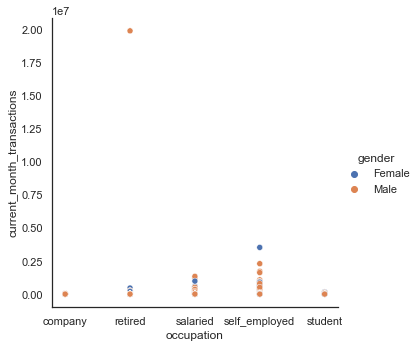

In [73]:
sns.relplot(x='occupation',y='current_month_transactions',hue='gender',data=data)

In [74]:
pd.DataFrame(data.groupby(by='gender')['current_month_transactions'].sum()).sort_values('current_month_transactions',ascending = False)

,current_month_transactions
gender,
Male,1.342333e+08
Female,5.569404e+07


In [75]:
pd.DataFrame(data.groupby(by='gender')['previous_month_transactions'].sum()).sort_values('previous_month_transactions',ascending = False)

,previous_month_transactions
gender,
Male,1.238263e+08
Female,5.500068e+07


In [76]:
pd.DataFrame(data.groupby(by='city')['current_month_transactions'].sum()).sort_values('current_month_transactions',ascending = False)

,current_month_transactions
city,
1020.0,55698813.71
1096.0,11881833.98
409.0,10714219.95
146.0,9825294.28
623.0,7794428.25
...,...
1293.0,0.06
307.0,0.02
1261.0,0.02


In [77]:
pd.DataFrame(data.groupby(by='city')['previous_month_transactions'].sum()).sort_values('previous_month_transactions',ascending = False)

,previous_month_transactions
city,
1020.0,42852115.80
1096.0,20843387.24
409.0,9696469.03
1232.0,7802753.21
146.0,7574916.17
...,...
1207.0,0.02
1174.0,0.02
732.0,0.02


In [78]:
data['gender'].value_counts()

Male      16548
Female    11309
Name: gender, dtype: int64

In [79]:
data['gender'].value_counts()/sum(data['gender'].value_counts())

Male      0.594034
Female    0.405966
Name: gender, dtype: float64

In [80]:
data['gender'].value_counts(normalize=True)

Male      0.594034
Female    0.405966
Name: gender, dtype: float64

In [81]:
data['occupation'].nunique()

5

In [82]:
data['occupation'].mode()

0    self_employed
Name: occupation, dtype: category
Categories (5, object): ['company', 'retired', 'salaried', 'self_employed', 'student']

In [83]:
data['occupation'].value_counts()

self_employed    17476
salaried          6704
student           2058
retired           2024
company             40
Name: occupation, dtype: int64

In [84]:
data['occupation'].value_counts(normalize=True)

self_employed    0.617483
salaried         0.236874
student          0.072716
retired          0.071514
company          0.001413
Name: occupation, dtype: float64

# Bernoulli

In [85]:
data[data['churn']==1]['gender'].value_counts().index

CategoricalIndex(['Male', 'Female'], categories=['Female', 'Male'], ordered=False, dtype='category')

In [86]:
data[data['churn']==1]['gender'].value_counts().values

array([3169, 1985], dtype=int64)

Text(0.5, 1.0, 'Bar Plot for gender Customers')

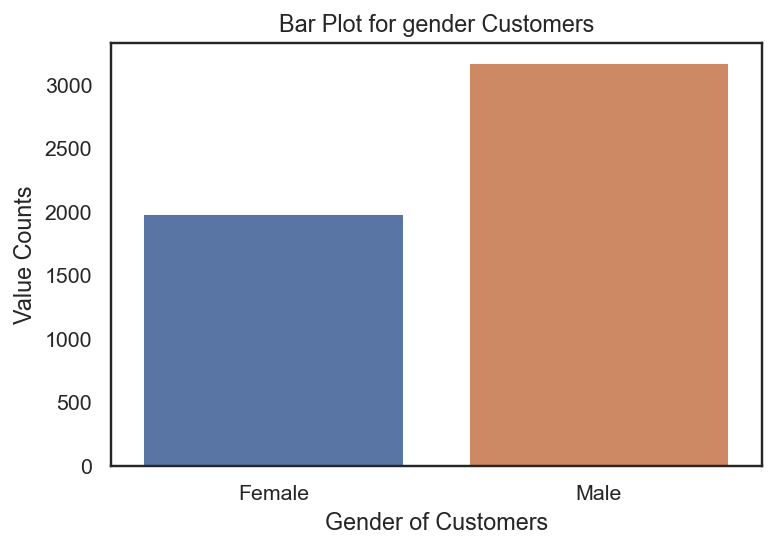

In [87]:
plt.figure(dpi=140)
ax = sns.barplot(x=data[data['churn']==1]['gender'].value_counts().index,y=data[data['churn']==1]['gender'].value_counts().values)
plt.xlabel("Gender of Customers")
plt.ylabel("Value Counts")
plt.title("Bar Plot for gender Customers")

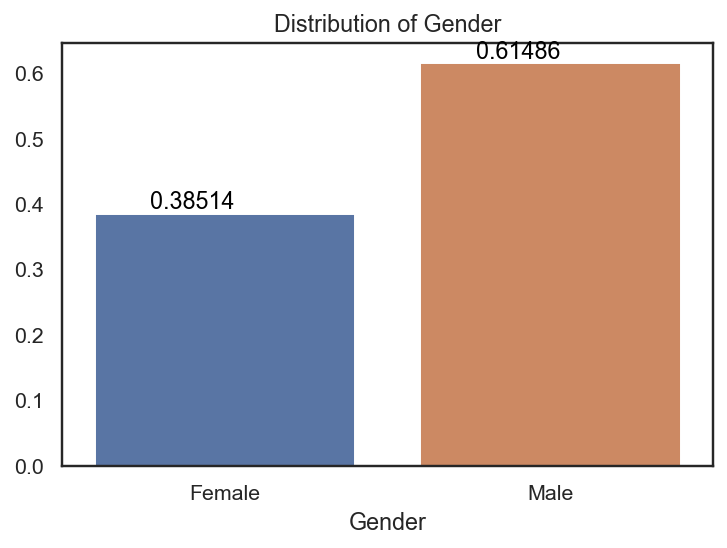

In [88]:
plt.figure(dpi = 140)
ax = sns.barplot(x=data[data['churn']==1]['gender'].value_counts().index, y = data[data['churn']==1]['gender'].value_counts(normalize=True).values, orient = 'v')
plt.title('Distribution of Gender')
plt.xlabel('Gender')

for p in ax.patches:
        ax.annotate('{:1.5f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
        
plt.show()

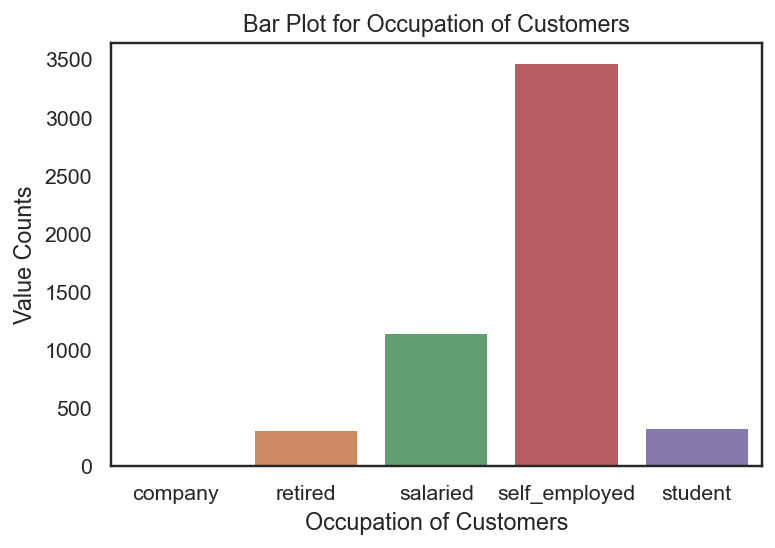

In [89]:
plt.figure(dpi = 140)
sns.barplot(x=data[data['churn']==1]['occupation'].value_counts().index, y = data[data['churn']==1]['occupation'].value_counts().values)
plt.xlabel("Occupation of Customers")
plt.ylabel('Value Counts')
plt.title("Bar Plot for Occupation of Customers")
plt.show()

# Univariate Analysis Categorical Vaiable

In [90]:
data.select_dtypes(exclude=['int64','float64','Int64']).dtypes

gender                  category
occupation              category
city                    category
customer_nw_category    category
branch_code             category
churn                   category
last_transaction          object
dtype: object

In [91]:
customer_info = ['gender','occupation','customer_nw_category']
account_info = ['city','branch_code']
churn = ['churn']

In [92]:
def UVA_category(data,var_group):
    """
    Univariate analysis categorical 
    takes a group of variables(category) and plot/print all the value counts and barplot
    """
    #setting figure size
    size = len(var_group)
    plt.figure(figsize = (7*size,5),dpi = 140)
    
    for j,i in enumerate(var_group):
        norm_count =  data[i].value_counts(normalize = True)
        n_uni = data[i].nunique()
        
        plt.subplot(1,size,j+1)
        sns.barplot(norm_count,norm_count.index,order = norm_count.index)
        plt.xlabel('fraction/percent',fontsize = 20)
        plt.ylabel('{}'.format(i),fontsize=20)
        plt.title('n_uniques = {} \n value counts \n{};'.format(n_uni,norm_count))

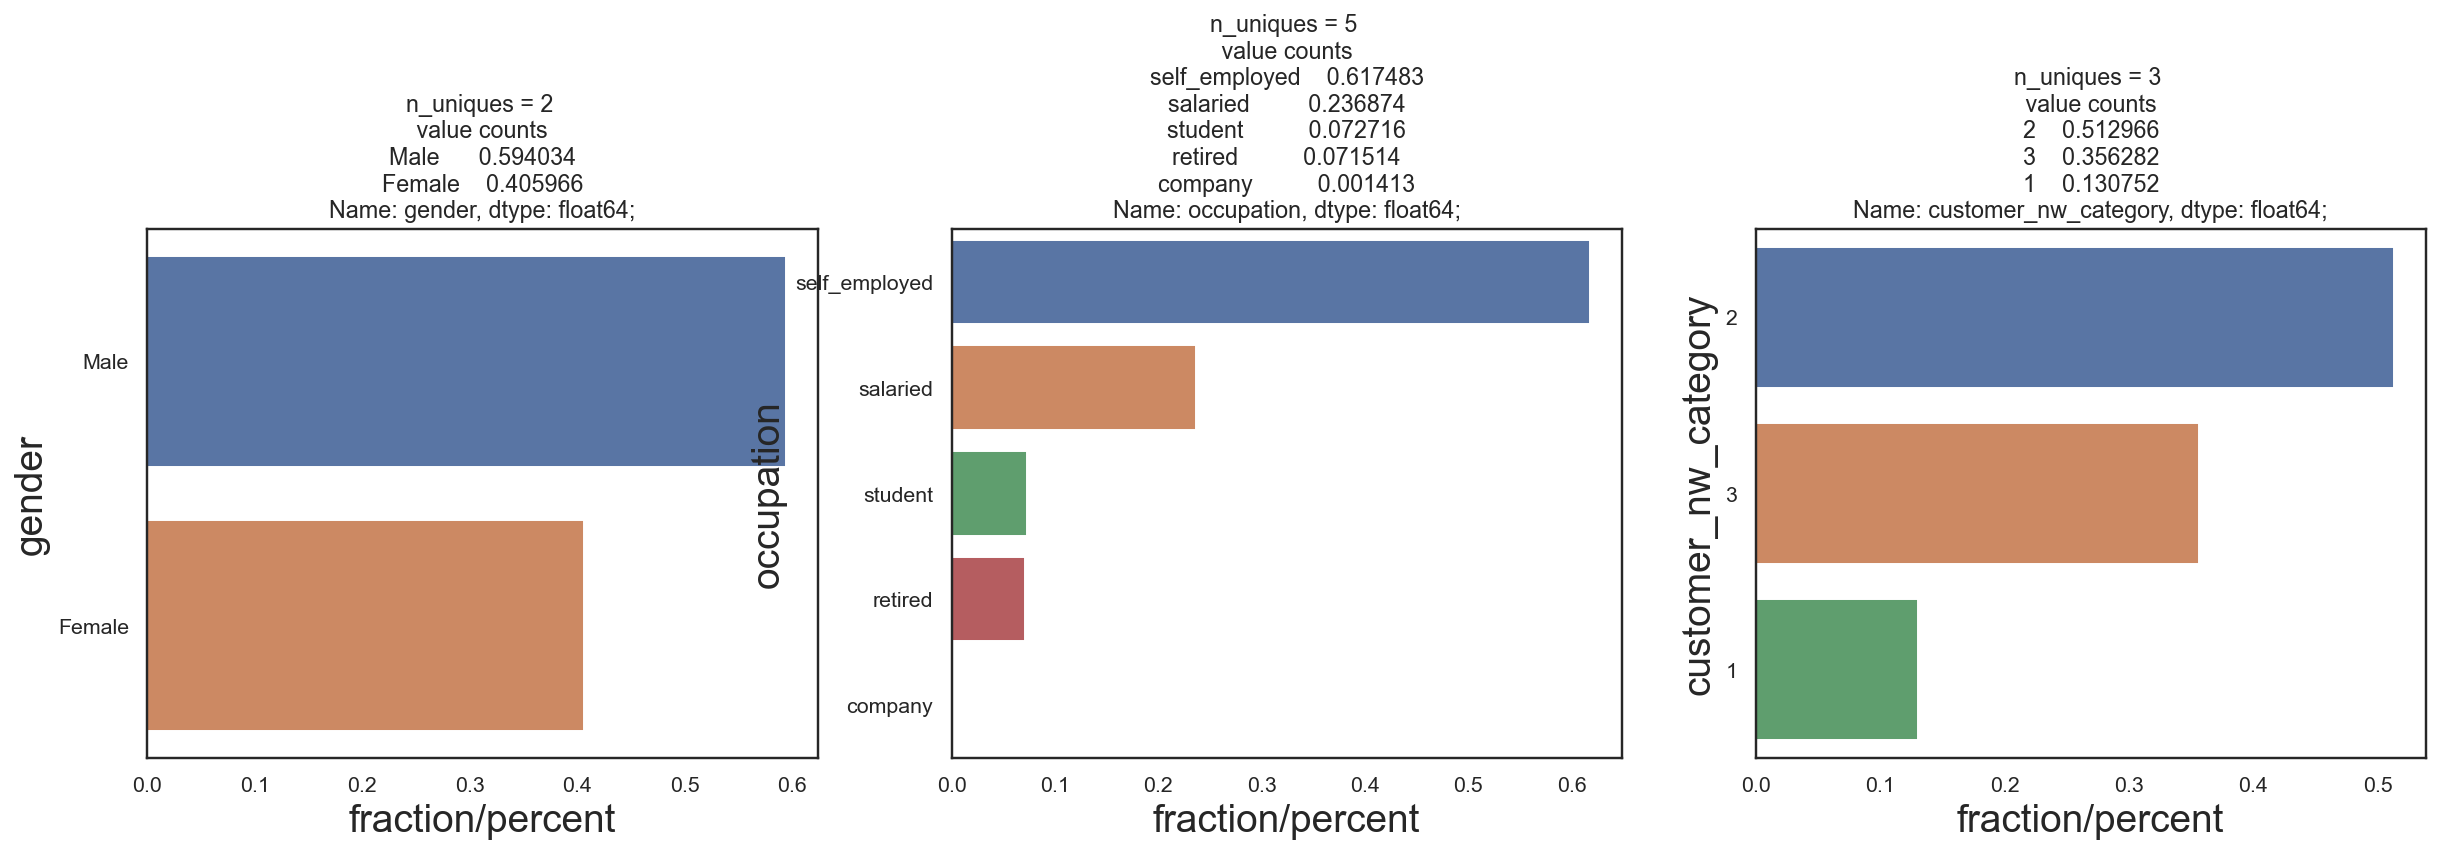

In [93]:
UVA_category(data,customer_info)

#### Summary
* Occupation:
    * The majority of people are self employed
    * There are extremely few company accounts

* Gender:
    * Males are 1.5 times the female accounts

* customer_nw_category:
    * Half of all accounts belong to 3rd net-worth category
    * Less than 50% belong to highest net-worth category
    
* Further investigations
    * which occupation accounts are the main reason behind the outlier transaction
        * Retired
    * Do customers bvelonging to highest net worth category accounts for highest valu of transactions

In [94]:
pd.DataFrame(data.groupby(by='customer_nw_category')['current_month_transactions'].sum()).sort_values('current_month_transactions',ascending = False)

,current_month_transactions
customer_nw_category,
2,1.112917e+08
1,5.803942e+07
3,3.195394e+07


In [95]:
pd.DataFrame(data.groupby(by='customer_nw_category')['previous_month_transactions'].sum()).sort_values('previous_month_transactions',ascending = False)

,previous_month_transactions
customer_nw_category,
2,88191678.17
1,64929794.91
3,34241045.76


* customers with highest net wort doesnt account for highest value of transactions

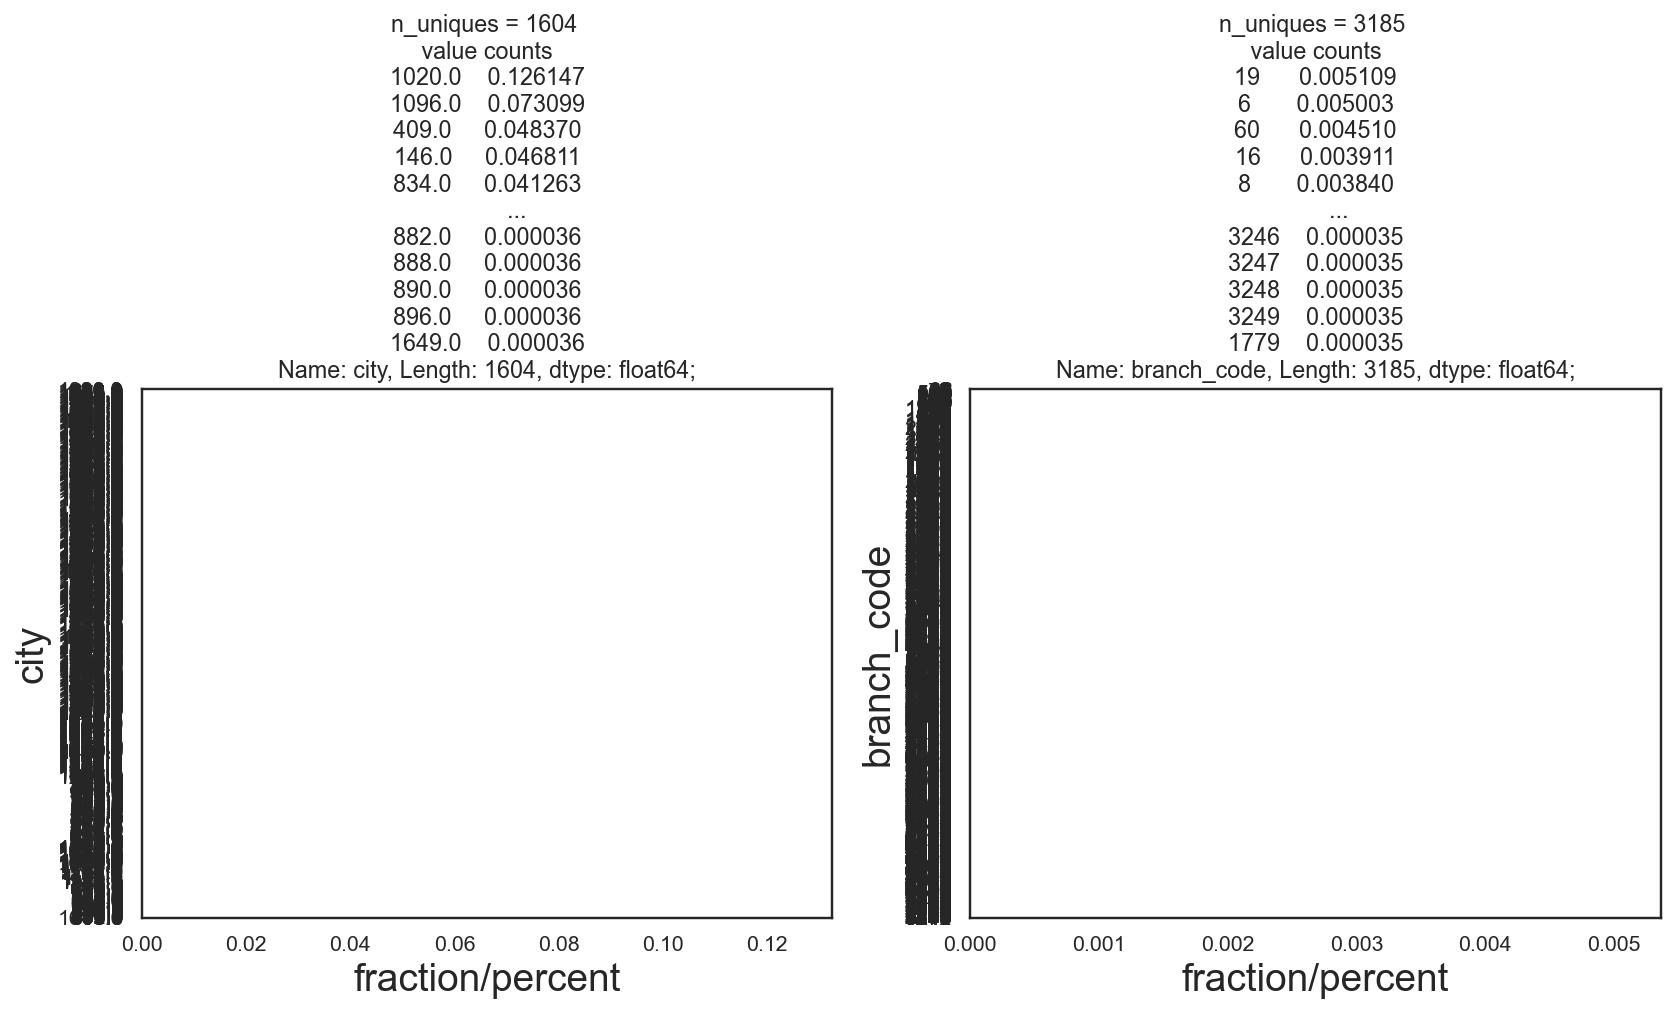

In [96]:
UVA_category(data,account_info)

<AxesSubplot:ylabel='city'>

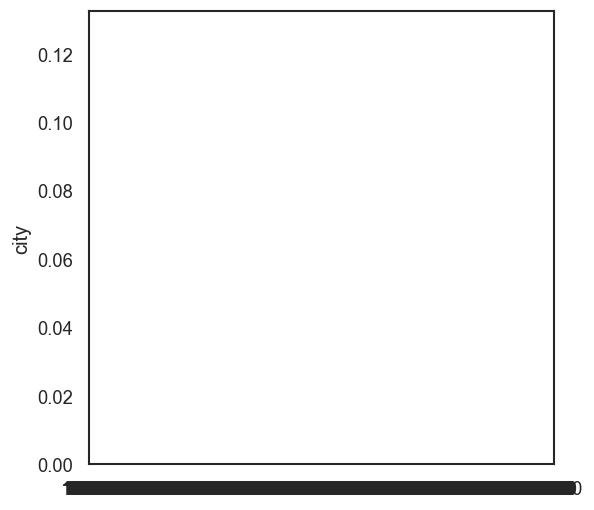

In [97]:
plt.figure(figsize = (5,5),dpi = 120)
city_count = data['city'].value_counts(normalize = True)
sns.barplot(city_count.index,city_count,order = city_count.index)

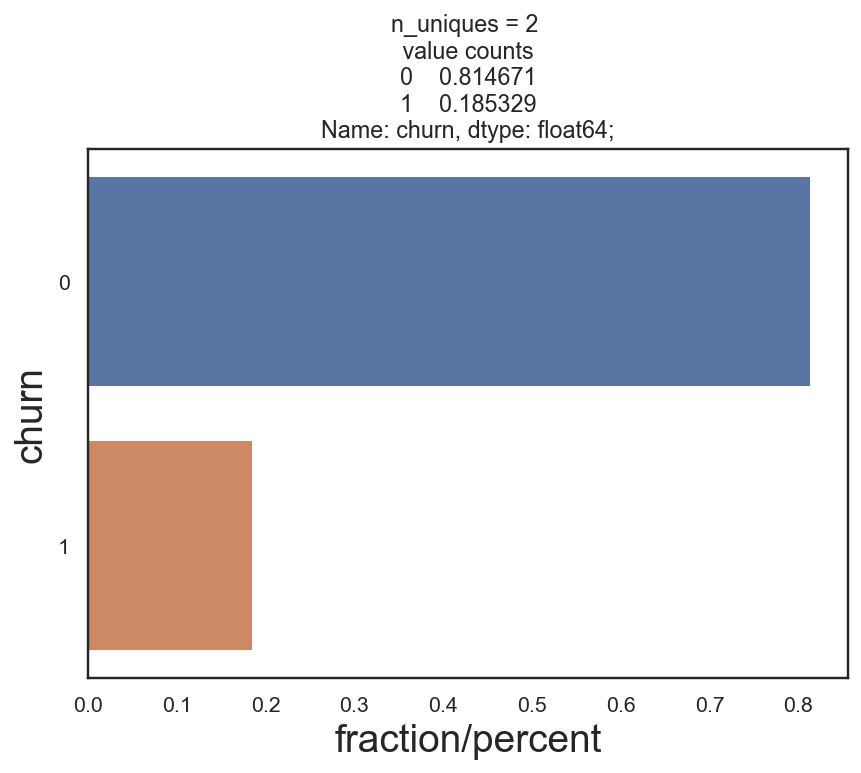

In [98]:
UVA_category(data,churn)

In [99]:
def UVA_outlier(data,var_group,include_outlier=True):
    """
    Univariate Analysis Outlier:
    takes a group of variable (InT and Float)  plot/print boxplots and descriptives\n
    run a loop calculate all the of ith variable and plot/print \n\n
    
    data:dataframe which to plot from \n
    var_group: {list} type of continuous variable\n
    include_outlier: {bool} whether to include outlier or not default=True\n
    """
    size = len(var_group)
    plt.figure(figsize = (7*size),dpi=140)
    
    for  j,i in enumerate(var_group):
        # calculating the descriptives of the variable
        quant25 = data[i].quantile(0.25)
        quant75  =data[i].qantile(0.75)
        IQR = quant75 - quant25
        med = data[i].median()
        whis_low = med-(1.5*IQR)
        whis_high  =med+(1.5*IQR)
        
        #calculating no.of outliers = 
        outlier_high = len(data[i][data[i]>whis_high])
        outlier_low = len(data[i][data[i]<whis_low])
        
        if include_outlier ==  True:
            print(include_outlier)
            plt.subplot(1,size,j+1)
            sns.boxplot(data[i],orient='v')
            plt.ylabel('{}'.format(i))
            plt.title('with outliers\nIQR = {}; Median = {},\n 2nd,3rd quartile = {}; outlier(low/high) = {}\n'.format(
                                                                                                                    round(IQR,2),
                                                                                                                    round(med,2),
                                                                                                                    (round(quant25,2),(round(quant75,2)),
                                                                                                                     (outlier_low,outlier_high)
                                                                                                                    ))
                      
        else:
            #repalcing outliers with max/min whisker
            data2 = data[var_group][:]
            data2[data2[i]>whis_high] =whis_high+1
            data2[data2[i]<whis_low] = whis_low-1
                      
            #plotting without outliers
            plt.subplot(1,size,j+1)
            sns.boxplot(data2[i],orient='v')
            plt.ylabel('{}'.format(i))
            plt.title('without outliers\nIQR = {}; Median = {},\n 2nd,3rd quartile = {}; outlier(low/high) = {}\n'.format(
                                                                                                                    round(IQR,2),
                                                                                                                    round(med,2),
                                                                                                                    (round(quant25,2),(round(quant75,2)),
                                                                                                                     (outlier_low,outlier_high)
                                                                                                                    ))
                      
            

SyntaxError: invalid syntax (2510230319.py, line 39)

In [100]:
# custom function for easy outlier analysis

def UVA_outlier(data, var_group, include_outlier = True):
  '''
  Univariate_Analysis_outlier:
  takes a group of variables (INTEGER and FLOAT) and plot/print boplot and descriptives\n
  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it \n\n

  data : dataframe from which to plot from\n
  var_group : {list} type Group of Continuous variables\n
  include_outlier : {bool} whether to include outliers or not, default = True\n
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,4), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = quant25-(1.5*IQR)
    whis_high = quant75+(1.5*IQR)

    # Calculating Number of Outliers
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])

    if include_outlier == True:
      print(include_outlier)
      #Plotting the variable with every information
      plt.subplot(1,size,j+1)
      sns.boxplot(data=data[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('With Outliers\nIQR = {}; Median = {} \n 1st,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))
      
    else:
      # replacing outliers with max/min whisker
      data2 = data[var_group][:]
      data2[i][data2[i]>whis_high] = whis_high+1
      data2[i][data2[i]<whis_low] = whis_low-1
      
      # plotting without outliers
      plt.subplot(1,size,j+1)
      sns.boxplot(data=data2[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('Without Outliers\nIQR = {}; Median = {} \n 1st,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))

True
True
True
True


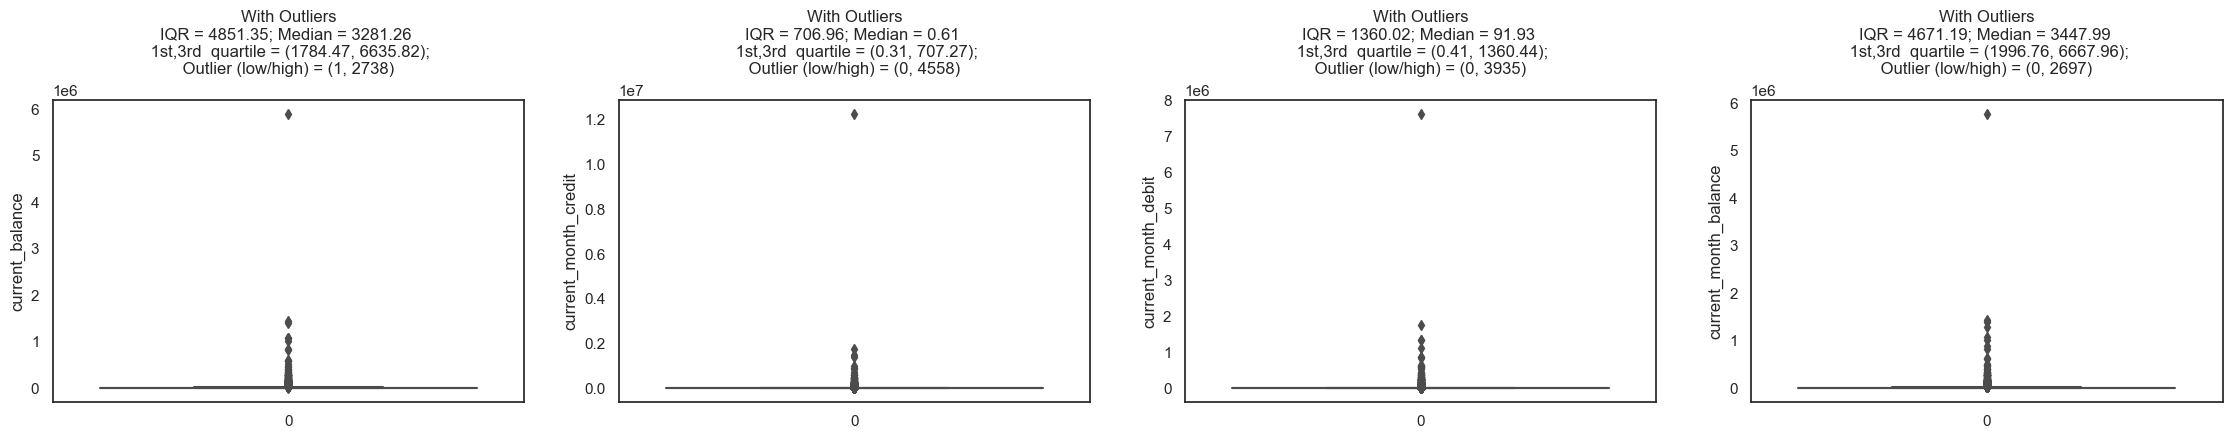

In [101]:
UVA_outlier(data,current_month)

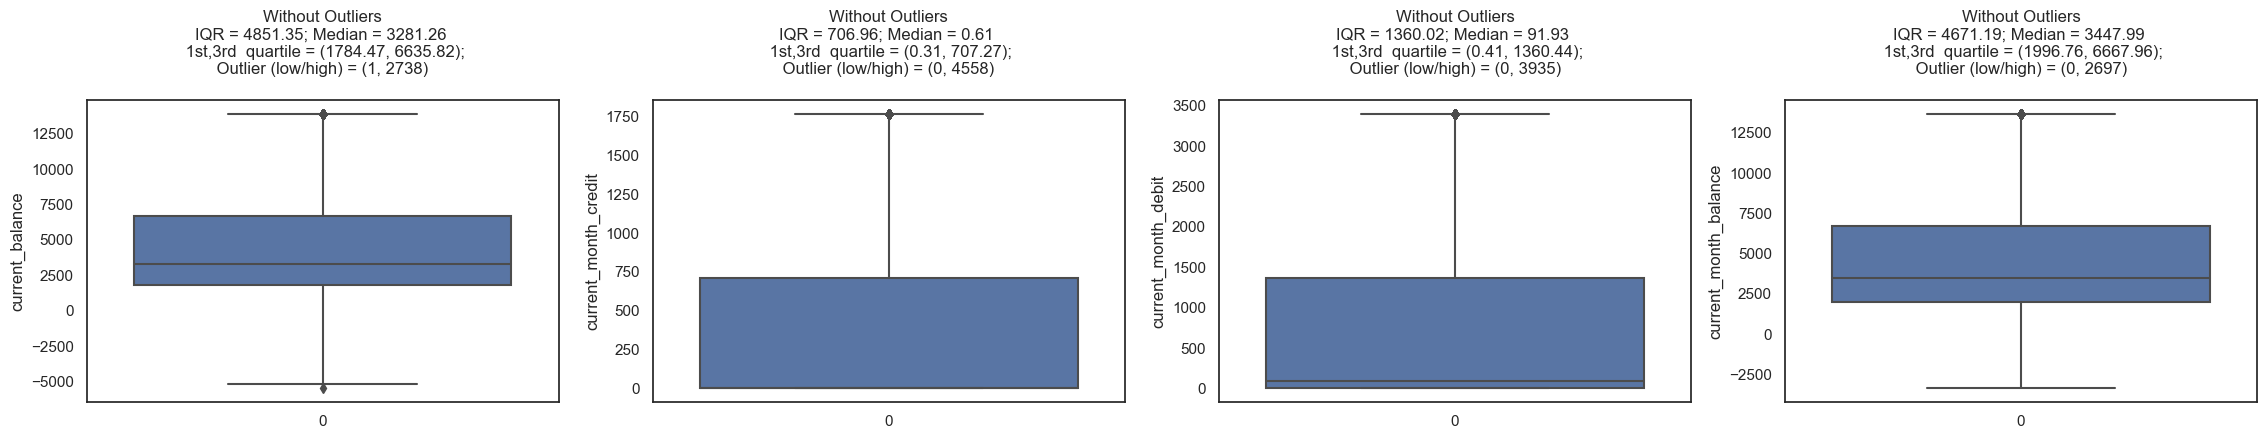

In [102]:
UVA_outlier(data,current_month,include_outlier =False)

In [103]:
population = data['vintage']
population

0        2101
1        2348
2        2194
3        2329
4        1579
         ... 
28377    2325
28378    1537
28379    2376
28380    1745
28381    1175
Name: vintage, Length: 28382, dtype: int64

In [104]:
population = pd.DataFrame(population)
population

,vintage
0,2101
1,2348
2,2194
3,2329
4,1579
...,...
28377,2325
28378,1537
28379,2376
28380,1745


array([[<AxesSubplot:title={'center':'vintage'}>]], dtype=object)

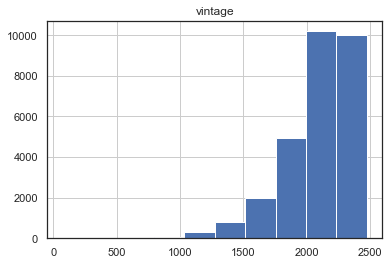

In [105]:
population.hist(bins=10)

In [106]:
population['vintage'].mean()

2091.1441054189277

In [107]:
sampled_means = []

for i in range(0,1000):
    sampled_means.append(population.sample(n=100).mean().values[0])

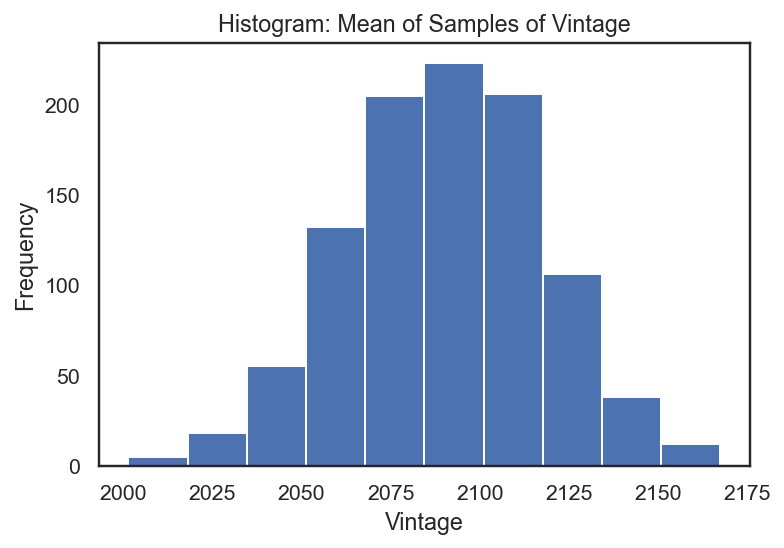

In [108]:
plt.figure(dpi=140)
plt.hist(sampled_means)
plt.xlabel("Vintage")
plt.ylabel("Frequency")
plt.title("Histogram: Mean of Samples of Vintage")
plt.show()

In [109]:
pd.Series(sampled_means).mean()

2090.476879999996

In [110]:
error = population['vintage'].mean() - pd.Series(sampled_means).mean()

In [111]:
error

0.6672254189315936

# Bi-Variate Analysis: Numerical, Numerical

In [112]:
numerical  = data.select_dtypes(include = ['int64','Int64','float64'])

In [113]:
numerical.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
dependents                          Int64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
doy_lst_transaction               float64
woy_lst_transaction               float64
moy_lst_transaction               float64
dow_lst_transaction               float64
current_month_transactions        float64
previous_month_transactions       float64
dtype: object

## Correlation Matrix

In [115]:
numerical.corr()

,customer_id,vintage,age,dependents,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,doy_lst_transaction,woy_lst_transaction,moy_lst_transaction,dow_lst_transaction,current_month_transactions,previous_month_transactions
customer_id,1.000000,-0.007750,-0.000442,-0.008616,0.006589,0.005819,0.004485,-0.002532,0.002494,-0.006414,0.002603,-0.008760,0.005140,0.004553,-0.010550,0.007208,-0.009882,0.008990,0.002577,-0.008016
vintage,-0.007750,1.000000,0.006220,0.005192,0.000031,-0.000669,-0.002054,-0.001759,-0.004617,-0.000169,-0.004978,-0.006760,-0.000550,-0.002208,-0.004435,-0.012589,-0.005372,-0.008596,-0.004836,-0.003365
age,-0.000442,0.006220,1.000000,-0.000612,0.054346,0.058342,0.061708,0.059607,0.023840,0.029961,0.027702,0.033296,0.057662,0.060297,0.016642,0.003852,0.017257,-0.017958,0.025790,0.033764
dependents,-0.008616,0.005192,-0.000612,1.000000,-0.003070,0.000216,0.001213,0.002949,0.003260,0.025054,0.008207,0.032021,-0.000652,0.001239,0.079740,0.034460,0.077978,-0.001702,0.005309,0.030035
current_balance,0.006589,0.000031,0.054346,-0.003070,1.000000,0.947276,0.958307,0.714600,0.030371,0.061754,0.044412,0.081247,0.983412,0.942207,0.019978,-0.000374,0.019094,0.003441,0.036585,0.075688
previous_month_end_balance,0.005819,-0.000669,0.058342,0.000216,0.947276,1.000000,0.970530,0.722998,0.032493,0.114222,0.066329,0.109606,0.974714,0.969605,0.014381,0.003973,0.014125,0.004301,0.046837,0.120349
average_monthly_balance_prevQ,0.004485,-0.002054,0.061708,0.001213,0.958307,0.970530,1.000000,0.763495,0.033639,0.085699,0.060579,0.121272,0.976290,0.994038,0.012688,0.002552,0.012721,0.003469,0.045181,0.109152
average_monthly_balance_prevQ2,-0.002532,-0.001759,0.059607,0.002949,0.714600,0.722998,0.763495,1.000000,0.036271,0.062264,0.045239,0.102519,0.725826,0.736635,0.006363,-0.012678,0.005499,-0.002391,0.040501,0.086264
current_month_credit,0.002494,-0.004617,0.023840,0.003260,0.030371,0.032493,0.033639,0.036271,1.000000,0.168561,0.937021,0.135729,0.034182,0.038254,0.033129,0.010479,0.031521,0.000947,0.989741,0.165034
previous_month_credit,-0.006414,-0.000169,0.029961,0.025054,0.061754,0.114222,0.085699,0.062264,0.168561,1.000000,0.165092,0.733953,0.085320,0.108496,0.071645,0.019146,0.068229,-0.007766,0.169755,0.944651


In [116]:
c = numerical.corr().abs()
s = c.unstack()
so = s.sort_values(kind = 'quicksort',ascending = False)
so = pd.DataFrame(so,columns = ['Pearson Correlation'])


In [118]:
so[so['Pearson Correlation'] < 1].head(20)

,,Pearson Correlation
doy_lst_transaction,moy_lst_transaction,0.994550
moy_lst_transaction,doy_lst_transaction,0.994550
previous_month_balance,average_monthly_balance_prevQ,0.994038
average_monthly_balance_prevQ,previous_month_balance,0.994038
current_month_credit,current_month_transactions,0.989741
current_month_transactions,current_month_credit,0.989741
current_balance,current_month_balance,0.983412
current_month_balance,current_balance,0.983412
current_month_transactions,current_month_debit,0.977309
current_month_debit,current_month_transactions,0.977309


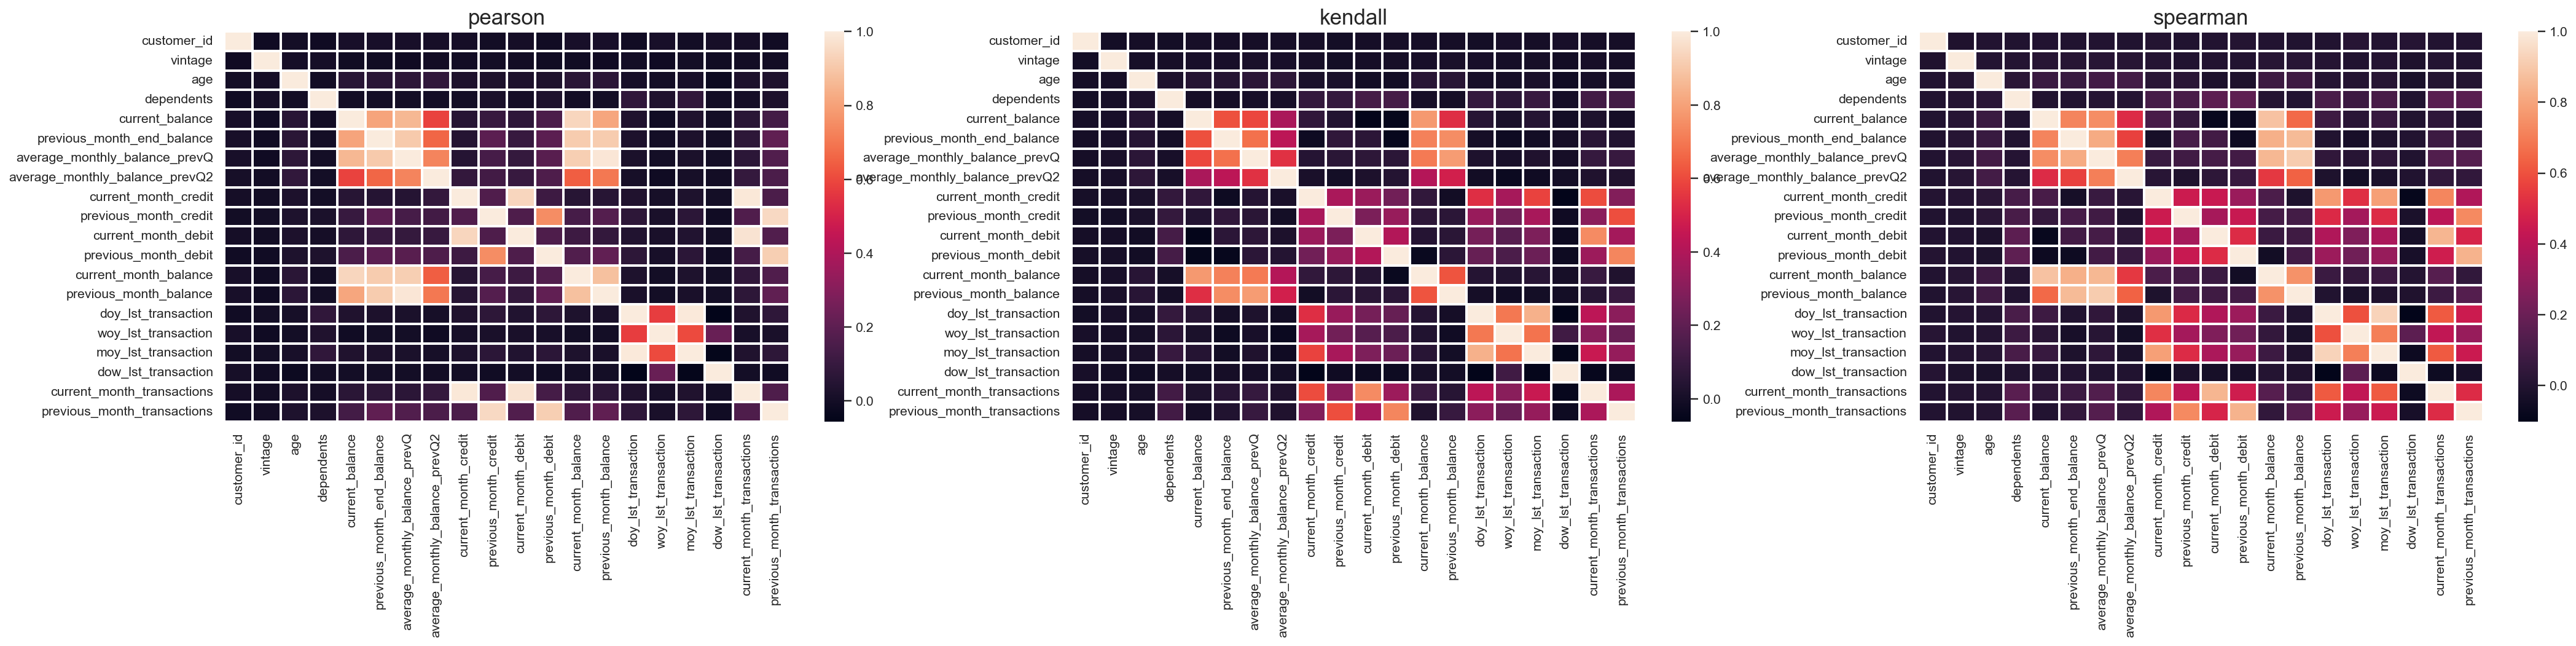

In [120]:
plt.figure(figsize = (36,6),dpi = 140)
for j,i in enumerate(['pearson','kendall','spearman']):
    plt.subplot(1,3,j+1)
    correlation = numerical.dropna().corr(method=i)
    sns.heatmap(correlation,linewidth=2)
    plt.title(i,fontsize = 18)

* Kendall and spearman are almost the same with similar pattern between them
* Many Variables have insignificant correlation
* Major correlation lies between transaction and balance variables

In [122]:
var = []
var.extend(previous_month)
var.extend(current_month)
var.extend(previous_quarter)

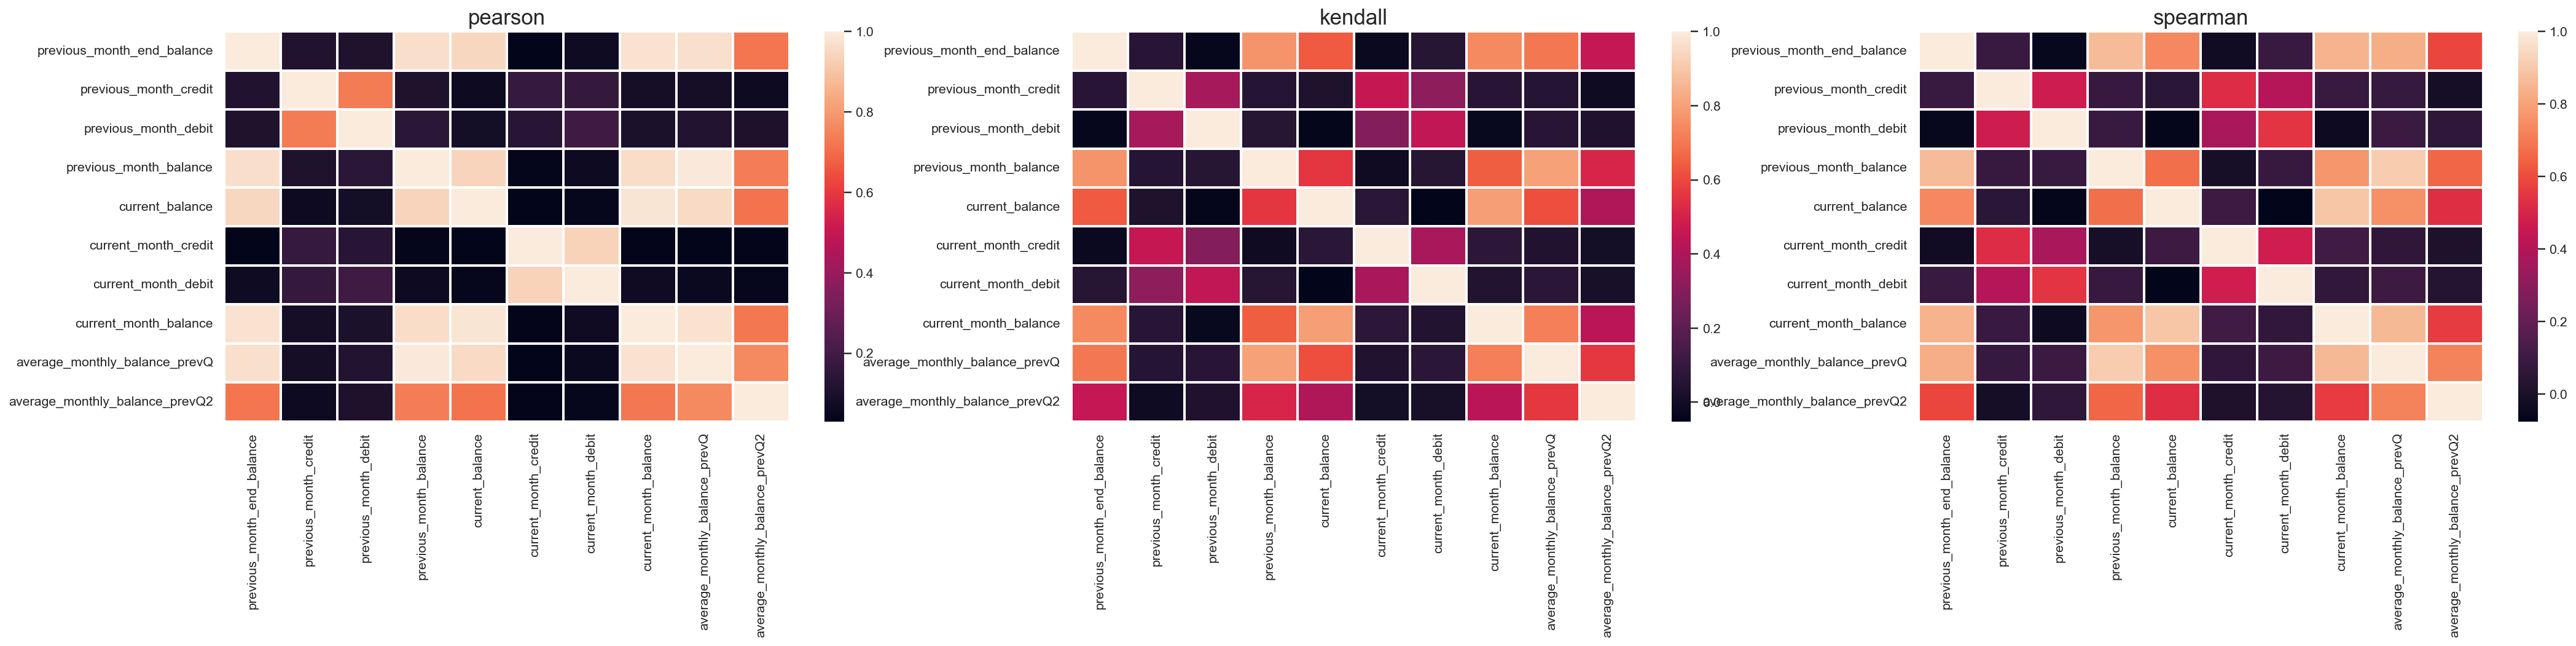

In [123]:
plt.figure(figsize = (36,6),dpi = 140)
for j,i in enumerate(['pearson','kendall','spearman']):
    plt.subplot(1,3,j+1)
    correlation = numerical[var].dropna().corr(method=i)
    sns.heatmap(correlation,linewidth=2)
    plt.title(i,fontsize = 18)

* Transaction Variables like credit/debit have strong correlation among themselves
* balance variables have strong correlation among themselves
* Transaction variables like credit/debit have insignificant or no relationship with the balance variables

# Scatter plot

In [125]:
transaction = ['current_month_credit','current_month_debit','previous_month_credit','previous_month_debit']
balance = ['previous_month_end_balance','previous_month_balance','current_balance','current_month_balance']

In [127]:
plt.figure(dpi = 140)
sns.pairplot(numerical[transaction],plot_kws = {'alpha':0.1})

KeyboardInterrupt: 

<Figure size 840x560 with 0 Axes>

Error in callback <function flush_figures at 0x0000026F15A83700> (for post_execute):


KeyboardInterrupt: 

In [ ]:
for column in var:
    mini = 1
    if numerical[column].min()<0:
        mini = abs(numerical[columns].min())+1
        